In [1]:
# this is adapted based on https://github.com/hrome13/AlgoWiki/blob/main/Analysis/Space%20and%20Time%20Plots.ipynb

from matplotlib import pyplot as plt
import importlib
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import mplcursors
import math
from standard_codes import *
from processed_data import full_data, aux_data
from helper_functions import *



plt.style.use('default')
    

all_colors = ['', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#ff00ff', '#00ffff', 
                # '#777777',
              '#7700ff', '#0077ff', '#00ff77', '#777700', '#77ff77', '#ff7777', '#000000']
            

In [2]:
def make_model_plots(data):
    names = list(data.keys())
    names.sort(key= lambda name: (data[name]["year"], -1*data[name]["model"]))
    years = [data[name]["year"] for name in names]
    models = [data[name]["model"] for name in names]
    freqs = [data[name]["freq"] for name in names]
    decades = [data[name]["decade"] for name in names]
    colors = [all_colors[data[name]["model"]] for name in names] # c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    complexity_models = ["", "PRAM-CRCW", "PRAM-CREW", "PRAM-EREW", "Other PRAMs", 
                         "SIMD", "MIMD", "Sort Models", "WordRAM", "Other models"]
    avail_decades = ["","60s","70s","80s","90s","2000s","2010s","2020s"]
    model_ranges = list(range(0,len(complexity_models)))

    decade_als = {}
    for dec in range(1,len(avail_decades)):
        for m in range(1,len(complexity_models)):
            total_freq = sum(v["freq"] for k, v in data.items() if v["decade"] == dec and v["model"]==m)
            if total_freq > 0:
                decade_als[str(dec)+str(m)] = {"model": m, "decade": dec, "freq": total_freq}
    dec_decades = [decade_als[name]["decade"] for name in decade_als.keys()]
    dec_models = [decade_als[name]["model"] for name in decade_als.keys()]
    dec_colors = [all_colors[decade_als[name]["model"]] for name in decade_als.keys()]
    dec_freqs = [decade_als[name]["freq"] for name in decade_als.keys()]
    dec_sizes = [decade_als[name]["freq"]**2 for name in decade_als.keys()]
    
    
    # 1 - SCATTER PLOT
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    ax.scatter(years, models, c=colors)
    ax.set_yticks(model_ranges)
    ax.set_yticklabels(complexity_models)
    ax.set_title("Computational Models Throughout Time")
    ax.set_ylabel("Computational Model")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
    
    # 2 - SCATTER PLOT were dot sizes are based on frequency
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    sizes = [4*f**2 for f in freqs]
    ax.scatter(years, models, c=colors, s=sizes)
    ax.set_yticks(model_ranges)
    ax.set_yticklabels(complexity_models)
    ax.set_title("Computational Models Throughout Time")
    ax.set_ylabel("Computational Model")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
        
    # 3 - SCATTER PLOT with decades
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    ax.scatter(dec_decades, dec_models, c=dec_colors, s=dec_sizes)
    ax.set_yticks(model_ranges)
    ax.set_yticklabels(complexity_models)
    ax.set_xticklabels(avail_decades)
    ax.set_title("Computational Models Throughout Time")
    ax.set_ylabel("Computational Model")
    ax.set_xlabel("Decade")
    ax.xaxis.get_major_locator().set_params(integer=True)
    for i in range(len(decade_als)):
        ax.annotate(dec_freqs[i],(dec_decades[i]+0.15,dec_models[i]+0.2))
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()

    # 4 - SCATTER PLOT with error bars to show frequency
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    plt.errorbar(years, models, yerr=[f*0.2 for f in freqs], fmt='.', ecolor=colors)
    ax.set_yticks(model_ranges)
    ax.set_yticklabels(complexity_models)
    ax.set_title("Computational Models Throughout Time")
    ax.set_ylabel("Computational Model")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()

    # 5 - STACKED BAR CHART
    weight_counts = {}
    for m in range(len(complexity_models)):
        weight_counts[m] = [0]*len(avail_decades[1:])
    for name in decade_als.keys():
        weight_counts[decade_als[name]["model"]][decade_als[name]["decade"]-1] = decade_als[name]["freq"]
    width = 0.5
    fig, ax = plt.subplots()
    bottom = np.zeros(len(avail_decades)-1)
    for boolean, weight_count in weight_counts.items():
        p = ax.bar(avail_decades[1:], weight_count, width, label=complexity_models[boolean], bottom=bottom,color=all_colors[boolean])
        bottom += weight_count
    ax.set_title("Computational Models Throughout Time")
    ax.set_ylabel("Number of Algoritms")
    ax.set_xlabel("Decade")
    ax.legend(loc="upper right")
    plt.show()

    # def gaussian(x, mean, amplitude, standard_deviation):
    #     return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

    # 6 - BAR CHART
    weight_counts[0] = avail_decades[1:]
    df2 =pd.DataFrame(weight_counts, columns = [0, 1])
    df = pd.DataFrame(weight_counts, 
                    columns = list(weight_counts.keys()) )
    ax = df2.plot.bar(rot=0,color='#E6E9ED',width=0)
    ax = df.plot.bar(rot=0, ax=ax, color= all_colors[1:len(complexity_models)], 
                    width = 0.8 )
    for p in ax.patches[1:]:
        h = p.get_height()
        x = p.get_x()+p.get_width()/2.
        if h != 0:
            ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                    textcoords="offset points", ha="center", va="bottom")
    ax.set_xlim(-0.5, None)
    ax.margins(y=0)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    ax.set_xticklabels(df[0])

    # for m in range(len(complexity_models)):
    # m = 1
    # xData = [v["decade"] for k, v in data.items() if v["model"]==m]
    # yData = [v["freq"] for k, v in data.items() if v["model"]==m]
    # fittedParameters, pcov = curve_fit(gaussian, xData, yData)
    # y_fit = gaussian(xData, *fittedParameters)
    # plt.plot(xData, y_fit) # plot the equation using the fitted parameters

    plt.show()

    # Next plots:
    # - similar to 6, is there a way to make it interactable? e.g. hovering over one model makes it more prominent
    # - and also, a way to fit each model to a curve? If that works, should do that with years instead of decades
    # - same as 2 and 3, but try playing with transparency as well


    

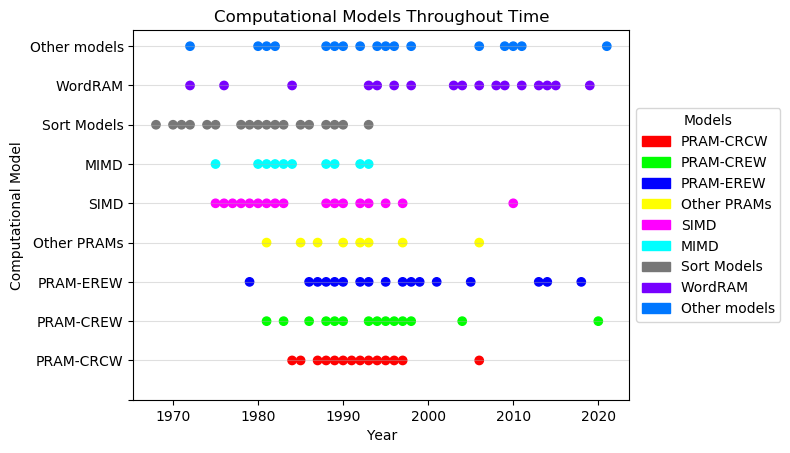

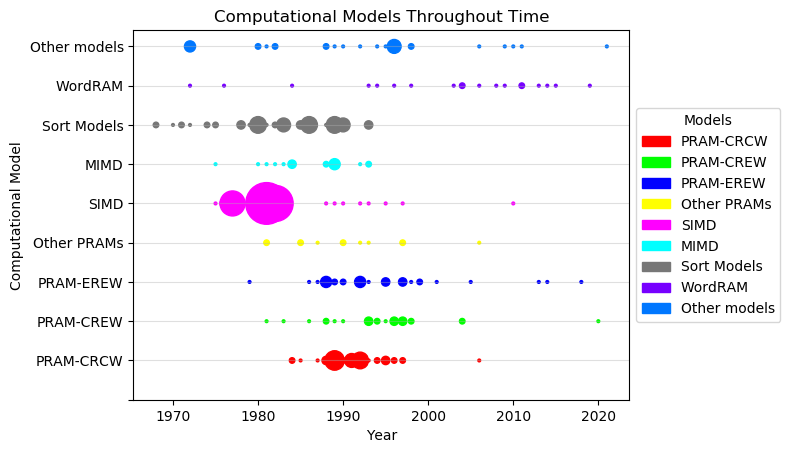

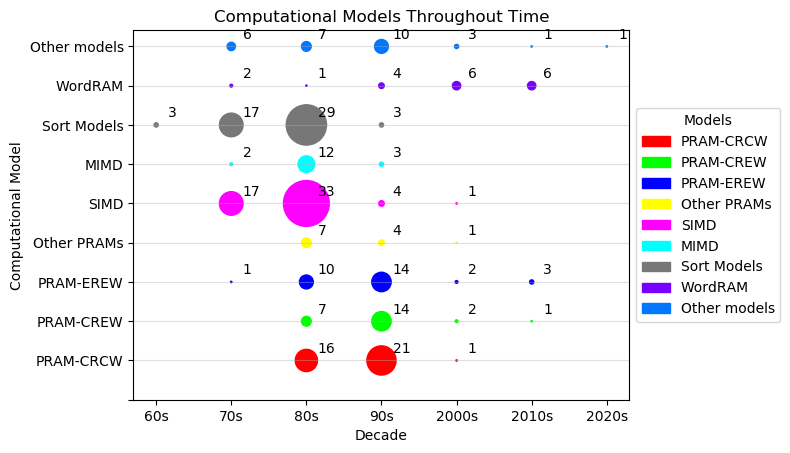

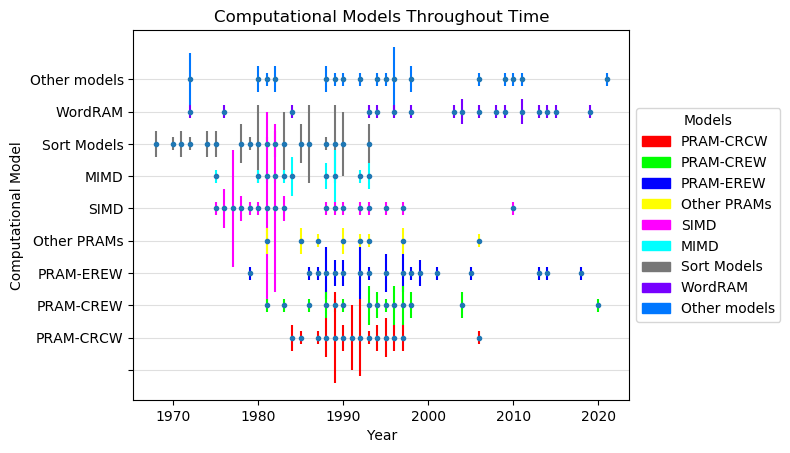

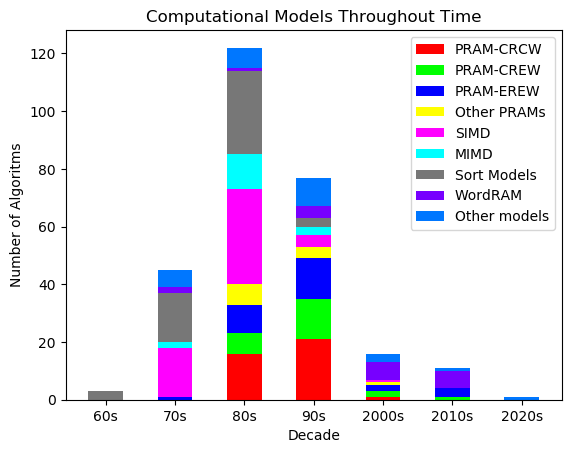

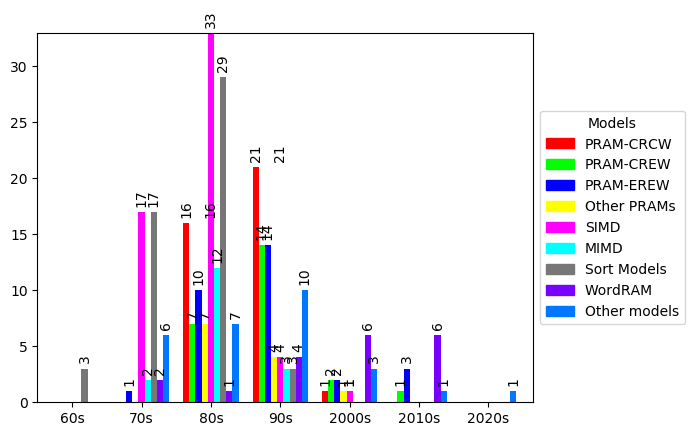

In [33]:
data = {
"DataPnt1": {"year": 1975, "model": 6, "decade": 2, "freq": 1},
"DataPnt2": {"year": 1980, "model": 6, "decade": 2, "freq": 1},
"DataPnt3": {"year": 1981, "model": 6, "decade": 3, "freq": 1},
"DataPnt4": {"year": 1982, "model": 6, "decade": 3, "freq": 1},
"DataPnt5": {"year": 1983, "model": 6, "decade": 3, "freq": 1},
"DataPnt6": {"year": 1984, "model": 6, "decade": 3, "freq": 3},
"DataPnt7": {"year": 1988, "model": 6, "decade": 3, "freq": 2},
"DataPnt8": {"year": 1989, "model": 6, "decade": 3, "freq": 4},
"DataPnt9": {"year": 1992, "model": 6, "decade": 4, "freq": 1},
"DataPnt10": {"year": 1993, "model": 6, "decade": 4, "freq": 2},
"DataPnt11": {"year": 1972, "model": 9, "decade": 2, "freq": 4},
"DataPnt12": {"year": 1980, "model": 9, "decade": 2, "freq": 2},
"DataPnt13": {"year": 1981, "model": 9, "decade": 3, "freq": 1},
"DataPnt14": {"year": 1982, "model": 9, "decade": 3, "freq": 2},
"DataPnt15": {"year": 1988, "model": 9, "decade": 3, "freq": 2},
"DataPnt16": {"year": 1989, "model": 9, "decade": 3, "freq": 1},
"DataPnt17": {"year": 1990, "model": 9, "decade": 3, "freq": 1},
"DataPnt18": {"year": 1992, "model": 9, "decade": 4, "freq": 1},
"DataPnt19": {"year": 1994, "model": 9, "decade": 4, "freq": 1},
"DataPnt20": {"year": 1995, "model": 9, "decade": 4, "freq": 1},
"DataPnt21": {"year": 1996, "model": 9, "decade": 4, "freq": 5},
"DataPnt22": {"year": 1998, "model": 9, "decade": 4, "freq": 2},
"DataPnt23": {"year": 2006, "model": 9, "decade": 5, "freq": 1},
"DataPnt24": {"year": 2009, "model": 9, "decade": 5, "freq": 1},
"DataPnt25": {"year": 2010, "model": 9, "decade": 5, "freq": 1},
"DataPnt26": {"year": 2011, "model": 9, "decade": 6, "freq": 1},
"DataPnt27": {"year": 2021, "model": 9, "decade": 7, "freq": 1},
"DataPnt28": {"year": 1984, "model": 1, "decade": 3, "freq": 2},
"DataPnt29": {"year": 1985, "model": 1, "decade": 3, "freq": 1},
"DataPnt30": {"year": 1987, "model": 1, "decade": 3, "freq": 1},
"DataPnt31": {"year": 1988, "model": 1, "decade": 3, "freq": 3},
"DataPnt32": {"year": 1989, "model": 1, "decade": 3, "freq": 7},
"DataPnt33": {"year": 1990, "model": 1, "decade": 3, "freq": 2},
"DataPnt34": {"year": 1991, "model": 1, "decade": 4, "freq": 5},
"DataPnt35": {"year": 1992, "model": 1, "decade": 4, "freq": 6},
"DataPnt36": {"year": 1993, "model": 1, "decade": 4, "freq": 1},
"DataPnt37": {"year": 1994, "model": 1, "decade": 4, "freq": 2},
"DataPnt38": {"year": 1995, "model": 1, "decade": 4, "freq": 3},
"DataPnt39": {"year": 1996, "model": 1, "decade": 4, "freq": 2},
"DataPnt40": {"year": 1997, "model": 1, "decade": 4, "freq": 2},
"DataPnt41": {"year": 2006, "model": 1, "decade": 5, "freq": 1},
"DataPnt42": {"year": 1981, "model": 2, "decade": 3, "freq": 1},
"DataPnt43": {"year": 1983, "model": 2, "decade": 3, "freq": 1},
"DataPnt44": {"year": 1986, "model": 2, "decade": 3, "freq": 1},
"DataPnt45": {"year": 1988, "model": 2, "decade": 3, "freq": 2},
"DataPnt46": {"year": 1989, "model": 2, "decade": 3, "freq": 1},
"DataPnt47": {"year": 1990, "model": 2, "decade": 3, "freq": 1},
"DataPnt48": {"year": 1993, "model": 2, "decade": 4, "freq": 3},
"DataPnt49": {"year": 1994, "model": 2, "decade": 4, "freq": 2},
"DataPnt50": {"year": 1995, "model": 2, "decade": 4, "freq": 1},
"DataPnt51": {"year": 1996, "model": 2, "decade": 4, "freq": 3},
"DataPnt52": {"year": 1997, "model": 2, "decade": 4, "freq": 3},
"DataPnt53": {"year": 1998, "model": 2, "decade": 4, "freq": 2},
"DataPnt54": {"year": 2004, "model": 2, "decade": 5, "freq": 2},
"DataPnt55": {"year": 2020, "model": 2, "decade": 6, "freq": 1},
"DataPnt56": {"year": 1979, "model": 3, "decade": 2, "freq": 1},
"DataPnt57": {"year": 1986, "model": 3, "decade": 3, "freq": 1},
"DataPnt58": {"year": 1987, "model": 3, "decade": 3, "freq": 1},
"DataPnt59": {"year": 1988, "model": 3, "decade": 3, "freq": 4},
"DataPnt60": {"year": 1989, "model": 3, "decade": 3, "freq": 2},
"DataPnt61": {"year": 1990, "model": 3, "decade": 3, "freq": 2},
"DataPnt62": {"year": 1992, "model": 3, "decade": 4, "freq": 4},
"DataPnt63": {"year": 1993, "model": 3, "decade": 4, "freq": 1},
"DataPnt64": {"year": 1995, "model": 3, "decade": 4, "freq": 3},
"DataPnt65": {"year": 1997, "model": 3, "decade": 4, "freq": 3},
"DataPnt66": {"year": 1998, "model": 3, "decade": 4, "freq": 1},
"DataPnt67": {"year": 1999, "model": 3, "decade": 4, "freq": 2},
"DataPnt68": {"year": 2001, "model": 3, "decade": 5, "freq": 1},
"DataPnt69": {"year": 2005, "model": 3, "decade": 5, "freq": 1},
"DataPnt70": {"year": 2013, "model": 3, "decade": 6, "freq": 1},
"DataPnt71": {"year": 2014, "model": 3, "decade": 6, "freq": 1},
"DataPnt72": {"year": 2018, "model": 3, "decade": 6, "freq": 1},
"DataPnt73": {"year": 1981, "model": 4, "decade": 3, "freq": 2},
"DataPnt74": {"year": 1985, "model": 4, "decade": 3, "freq": 2},
"DataPnt75": {"year": 1987, "model": 4, "decade": 3, "freq": 1},
"DataPnt76": {"year": 1990, "model": 4, "decade": 3, "freq": 2},
"DataPnt77": {"year": 1992, "model": 4, "decade": 4, "freq": 1},
"DataPnt78": {"year": 1993, "model": 4, "decade": 4, "freq": 1},
"DataPnt79": {"year": 1997, "model": 4, "decade": 4, "freq": 2},
"DataPnt80": {"year": 2006, "model": 4, "decade": 5, "freq": 1},
"DataPnt81": {"year": 1968, "model": 7, "decade": 1, "freq": 2},
"DataPnt82": {"year": 1970, "model": 7, "decade": 1, "freq": 1},
"DataPnt83": {"year": 1971, "model": 7, "decade": 2, "freq": 2},
"DataPnt84": {"year": 1972, "model": 7, "decade": 2, "freq": 1},
"DataPnt85": {"year": 1974, "model": 7, "decade": 2, "freq": 2},
"DataPnt86": {"year": 1975, "model": 7, "decade": 2, "freq": 2},
"DataPnt87": {"year": 1978, "model": 7, "decade": 2, "freq": 3},
"DataPnt88": {"year": 1979, "model": 7, "decade": 2, "freq": 1},
"DataPnt89": {"year": 1980, "model": 7, "decade": 2, "freq": 6},
"DataPnt90": {"year": 1981, "model": 7, "decade": 3, "freq": 1},
"DataPnt91": {"year": 1982, "model": 7, "decade": 3, "freq": 2},
"DataPnt92": {"year": 1983, "model": 7, "decade": 3, "freq": 5},
"DataPnt93": {"year": 1985, "model": 7, "decade": 3, "freq": 3},
"DataPnt94": {"year": 1986, "model": 7, "decade": 3, "freq": 6},
"DataPnt95": {"year": 1988, "model": 7, "decade": 3, "freq": 1},
"DataPnt96": {"year": 1989, "model": 7, "decade": 3, "freq": 6},
"DataPnt97": {"year": 1990, "model": 7, "decade": 3, "freq": 5},
"DataPnt98": {"year": 1993, "model": 7, "decade": 4, "freq": 3},
"DataPnt99": {"year": 1975, "model": 5, "decade": 2, "freq": 1},
"DataPnt100": {"year": 1976, "model": 5, "decade": 2, "freq": 3},
"DataPnt101": {"year": 1977, "model": 5, "decade": 2, "freq": 9},
"DataPnt102": {"year": 1978, "model": 5, "decade": 2, "freq": 2},
"DataPnt103": {"year": 1979, "model": 5, "decade": 2, "freq": 1},
"DataPnt104": {"year": 1980, "model": 5, "decade": 2, "freq": 1},
"DataPnt105": {"year": 1981, "model": 5, "decade": 3, "freq": 15},
"DataPnt106": {"year": 1982, "model": 5, "decade": 3, "freq": 13},
"DataPnt107": {"year": 1983, "model": 5, "decade": 3, "freq": 2},
"DataPnt108": {"year": 1988, "model": 5, "decade": 3, "freq": 1},
"DataPnt109": {"year": 1989, "model": 5, "decade": 3, "freq": 1},
"DataPnt110": {"year": 1990, "model": 5, "decade": 3, "freq": 1},
"DataPnt111": {"year": 1992, "model": 5, "decade": 4, "freq": 1},
"DataPnt112": {"year": 1993, "model": 5, "decade": 4, "freq": 1},
"DataPnt113": {"year": 1995, "model": 5, "decade": 4, "freq": 1},
"DataPnt114": {"year": 1997, "model": 5, "decade": 4, "freq": 1},
"DataPnt115": {"year": 2010, "model": 5, "decade": 5, "freq": 1},
"DataPnt116": {"year": 1972, "model": 8, "decade": 2, "freq": 1},
"DataPnt117": {"year": 1976, "model": 8, "decade": 2, "freq": 1},
"DataPnt118": {"year": 1984, "model": 8, "decade": 3, "freq": 1},
"DataPnt119": {"year": 1993, "model": 8, "decade": 4, "freq": 1},
"DataPnt120": {"year": 1994, "model": 8, "decade": 4, "freq": 1},
"DataPnt121": {"year": 1996, "model": 8, "decade": 4, "freq": 1},
"DataPnt122": {"year": 1998, "model": 8, "decade": 4, "freq": 1},
"DataPnt123": {"year": 2003, "model": 8, "decade": 5, "freq": 1},
"DataPnt124": {"year": 2004, "model": 8, "decade": 5, "freq": 2},
"DataPnt125": {"year": 2006, "model": 8, "decade": 5, "freq": 1},
"DataPnt126": {"year": 2008, "model": 8, "decade": 5, "freq": 1},
"DataPnt127": {"year": 2009, "model": 8, "decade": 5, "freq": 1},
"DataPnt128": {"year": 2011, "model": 8, "decade": 6, "freq": 2},
"DataPnt129": {"year": 2013, "model": 8, "decade": 6, "freq": 1},
"DataPnt130": {"year": 2014, "model": 8, "decade": 6, "freq": 1},
"DataPnt131": {"year": 2015, "model": 8, "decade": 6, "freq": 1},
"DataPnt132": {"year": 2019, "model": 8, "decade": 6, "freq": 1},
}

make_model_plots(data)

In [35]:
def make_graphs(algs, name, span_complexities, work_complexities, complexity_models):
    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["dense_span"]))
    years = [algs[name]["year"] for name in names]
    sparse_spans = [algs[name]["sparse_span"] for name in names]
    sparse_works = [algs[name]["sparse_work"] for name in names]
    dense_spans = [algs[name]["dense_span"] for name in names]
    dense_works = [algs[name]["dense_work"] for name in names]
    models = [algs[name]["model"] for name in names]
    colors = [all_colors[algs[name]["model"]] for name in names] # c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    model_ranges = list(range(0,len(complexity_models)))
    span_ranges = list(range(0,len(span_complexities)))
    work_ranges = list(range(0,len(work_complexities)))

    ####### SPARSE GRAPHS ##########
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["sparse_span"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_spans, c=all_colors[m], where='post')
    ax.scatter(years, sparse_spans, c=colors)
    ax.set_yticks(span_ranges)
    ax.set_yticklabels(span_complexities)
    ax.set_title(name + " Sparse Graphs - Span Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
    
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["sparse_work"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_spans, c=all_colors[m], where='post')
    ax.scatter(years, sparse_works, c=colors)
    ax.set_yticks(work_ranges)
    ax.set_yticklabels(work_complexities)
    ax.set_title(name + " Sparse Graphs - Work Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.scatter(sparse_spans, sparse_works, c=colors)
    ax.set_title(name + " Sparse Graphs - Work vs Span")
    ax.set_xticks(span_ranges)
    ax.set_yticks(work_ranges)
    ax.set_xticklabels(span_complexities, rotation=90)
    ax.set_yticklabels(work_complexities)
    ax.set_ylabel("Work Complexity Class")
    ax.set_xlabel("Span Complexity Class")
    for i in range(len(algs)):
        ax.annotate(years[i],(sparse_spans[i],sparse_works[i]))
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
    
    
    ######### DENSE GRAPHS ############
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["dense_span"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_spans, c=all_colors[m], where='post')
    ax.scatter(years, dense_spans, c=colors)
    ax.set_yticks(span_ranges)
    ax.set_yticklabels(span_complexities)
    ax.set_title(name + " Dense Graphs - Span Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
    
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["dense_work"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_spans, c=all_colors[m], where='post')
    ax.scatter(years, dense_works, c=colors)
    ax.set_yticks(work_ranges)
    ax.set_yticklabels(work_complexities)
    ax.set_title(name + " Dense Graphs - Work Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.scatter(dense_spans, dense_works, c=colors)
    ax.set_title(name + " Dense Graphs - Work vs Span")
    ax.set_xticks(span_ranges)
    ax.set_yticks(work_ranges)
    ax.set_xticklabels(span_complexities, rotation=90)
    ax.set_yticklabels(work_complexities)
    ax.set_ylabel("Work Complexity Class")
    ax.set_xlabel("Span Complexity Class")
    for i in range(len(algs)):
        ax.annotate(years[i],(dense_spans[i],dense_works[i]))
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
        

    # # MODELS GRAPH
    # fig, ax = plt.subplots(1,1)
    # ax.grid(axis='y', alpha=0.4)
    # ax.scatter(years, models, c=colors)
    # ax.set_yticks(model_ranges)
    # ax.set_yticklabels(complexity_models)
    # ax.set_title(name + " Computational Models Throughout Time")
    # ax.set_ylabel("Computational Model")
    # ax.set_xlabel("Year")
    # ax.xaxis.get_major_locator().set_params(integer=True)
    # handles = []
    # for i in range(1,len(complexity_models)):
    #     new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
    #     handles.append(new_patch)
    # ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    # plt.show()



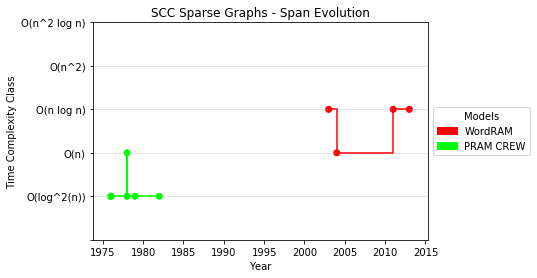

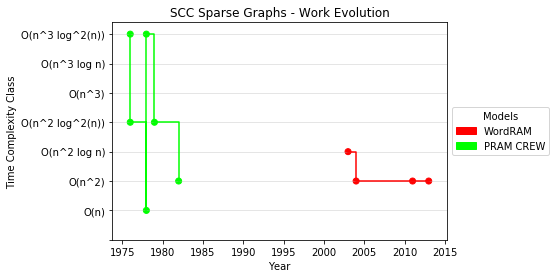

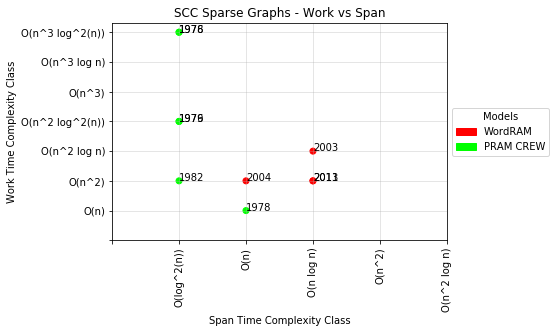

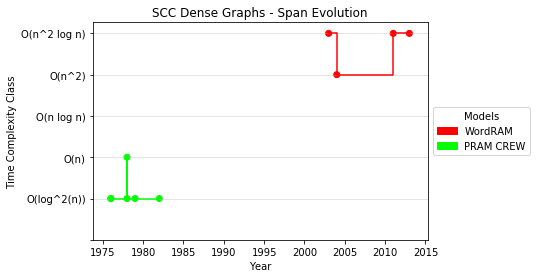

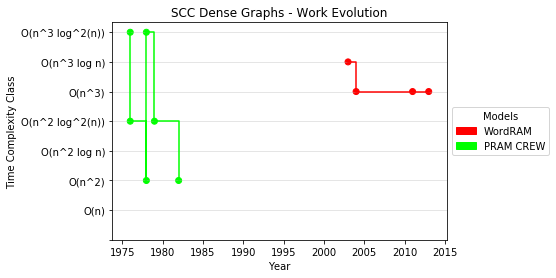

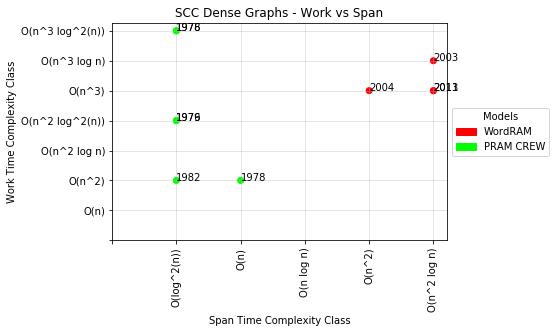

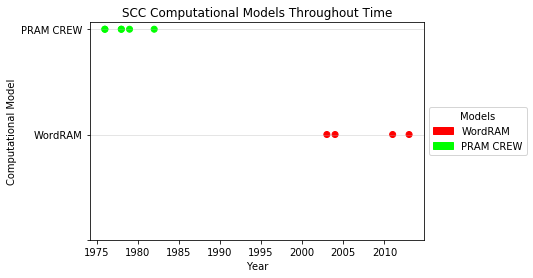

In [5]:
# SCC
scc_algs = {
        "Hirschberg (1976)": {"year": 1976, "sparse_span": 1, "dense_span": 1, "sparse_work": 7, "dense_work": 7, "model": 2},
        "Hirschberg (1976) (1)": {"year": 1976, "sparse_span": 1, "dense_span": 1, "sparse_work": 4, "dense_work": 4, "model": 2},
        "Reghbati (Arjomandi) and Corneil (1978)": {"year": 1978, "sparse_span": 2, "dense_span": 2, "sparse_work": 1, "dense_work": 2, "model": 2},
        "Reghbati (Arjomandi) and Corneil (1978) (1)": {"year": 1978, "sparse_span": 1, "dense_span": 1, "sparse_work": 7, "dense_work": 7, "model": 2},
        "Hirschberg et al. (1979)": {"year": 1979, "sparse_span": 1, "dense_span": 1, "sparse_work": 4, "dense_work": 4, "model": 2},
        "Chin et al. (1982)": {"year": 1982, "sparse_span": 1, "dense_span": 1, "sparse_work": 2, "dense_work": 2, "model": 2},
        "Fleischer forward-backward (FB) algorithm (2003)": {"year": 2003, "sparse_span": 3, "dense_span": 5, "sparse_work": 3, "dense_work": 6, "model": 1},
        "CH Algorithm (2004)": {"year": 2004, "sparse_span": 2, "dense_span": 4, "sparse_work": 2, "dense_work": 5, "model": 1},
        "OBF Algorithm (2011)": {"year": 2011, "sparse_span": 3, "dense_span": 5, "sparse_work": 2, "dense_work": 5, "model": 1},
        "Hong’s algorithm (2013)": {"year": 2013, "sparse_span": 3, "dense_span": 5, "sparse_work": 2, "dense_work": 5, "model": 1},
}
span_complexities = ["","O(log^2(n))","O(n)","O(n log n)","O(n^2)","O(n^2 log n)"]
work_complexities = ["","O(n)","O(n^2)","O(n^2 log n)","O(n^2 log^2(n))","O(n^3)","O(n^3 log n)","O(n^3 log^2(n))"]
complexity_models = ["", "WordRAM", "PRAM CREW"]
make_graphs(scc_algs, "SCC", span_complexities, work_complexities, complexity_models)

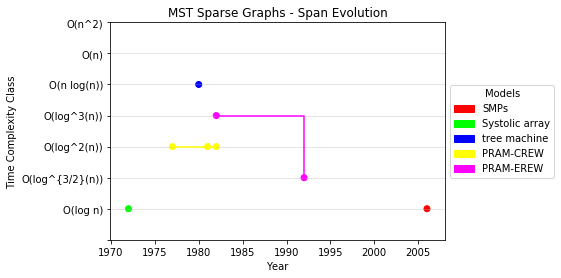

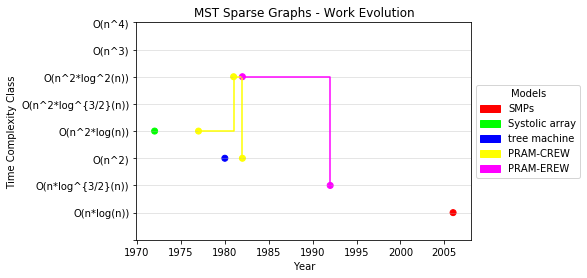

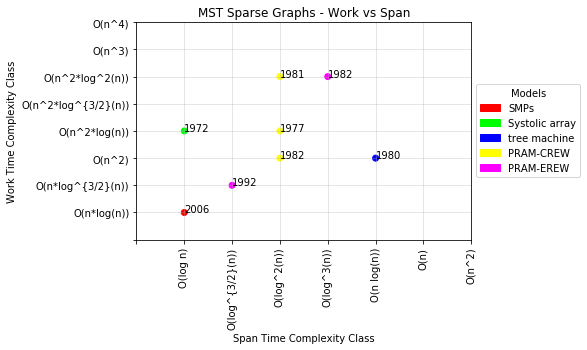

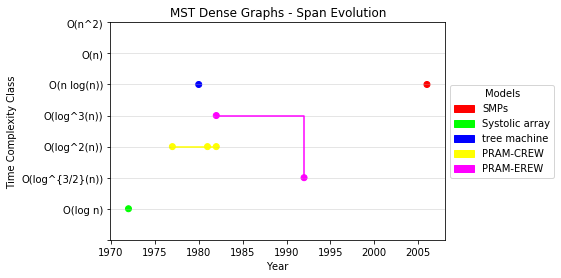

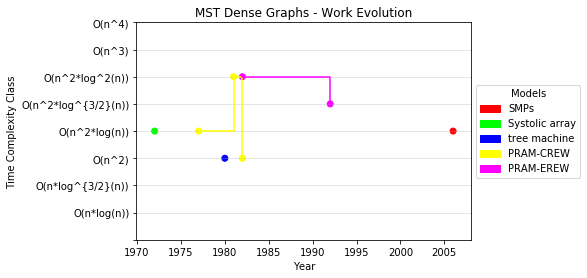

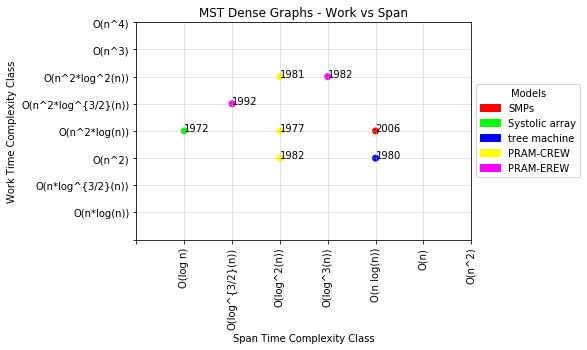

In [4]:
# MST
mst_algs = {
    "Bader & Cong Parallel Implementation  (2006)": {"year": 2006, "sparse_span": 1, "dense_span": 5, "sparse_work": 1, "dense_work": 4, "model": 1},
        "Levitt and Kautz  (1972)": {"year": 1972, "sparse_span": 6, "dense_span": 6, "sparse_work": 7, "dense_work": 7, "model": 2},
        "Levitt and Kautz  (1972)": {"year": 1972, "sparse_span": 6, "dense_span": 7, "sparse_work": 7, "dense_work": 8, "model": 2},
        "Levitt and Kautz  (1972)": {"year": 1972, "sparse_span": 1, "dense_span": 1, "sparse_work": 4, "dense_work": 4, "model": 2},
        "Savage (1977)": {"year": 1977, "sparse_span": 3, "dense_span": 3, "sparse_work": 4, "dense_work": 4, "model": 4},
        "Bentley (1980)": {"year": 1980, "sparse_span": 5, "dense_span": 5, "sparse_work": 3, "dense_work": 3, "model": 3},
        "Savage and Ja'Ja' (1981)": {"year": 1981, "sparse_span": 3, "dense_span": 3, "sparse_work": 6, "dense_work": 6, "model": 4},
        "Nath and Maheshwari (1982)": {"year": 1982, "sparse_span": 3, "dense_span": 3, "sparse_work": 4, "dense_work": 4, "model": 4},
        "Nath and Maheshwari (1982)": {"year": 1982, "sparse_span": 4, "dense_span": 4, "sparse_work": 6, "dense_work": 6, "model": 5},
        "Chin et al. (1982)": {"year": 1982, "sparse_span": 3, "dense_span": 3, "sparse_work": 3, "dense_work": 3, "model": 4},
        "Johnson, Metaxas (1992)": {"year": 1992, "sparse_span": 2, "dense_span": 2, "sparse_work": 2, "dense_work": 5, "model": 5}
}
span_complexities = ["","O(log n)","O(log^{3/2}(n))","O(log^2(n))","O(log^3(n))","O(n \log{n})","O(n)","O(n^2)"]
work_complexities = ["","O(n*log(n))","O(n*log^{3/2}(n))","O(n^2)","O(n^2*log(n))","O(n^2*log^{3/2}(n))","O(n^2*log^2(n))","O(n^3)","O(n^4)"]
complexity_models = ["","SMPs","Systolic array","tree machine","PRAM-CREW","PRAM-EREW"]
make_graphs(mst_algs, "MST", span_complexities, work_complexities, complexity_models)

In [40]:
def make_plots1(algs, name):
    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["span"]))
    years = [algs[name]["year"] for name in names]
    spans = [algs[name]["span"] for name in names]
    works = [algs[name]["work"] for name in names]
    models = [algs[name]["model"] for name in names]
    colors = [all_colors[algs[name]["model"]] for name in names]
    
    span_complexities = ["", "$O(\log{\log{n}})$", "$O(\log{n})$", "$O(\log{n}*\log{\log{n}})$", 
                         "$O(\log^2{n})$", "$O(n)$"]
    
    work_complexities = ["", "$O(n^2\log^2{n})$", "$O(n^3\log^2{\log {n}}/\log{n})$", 
                         "$O(n^3(\log \log n)^{3/2}/(\log n)^{1/2})$",
                          "$o(n^3)$", "$O(n^3)$", "$O(n^3(\log n)^{1/2}(\log \log n)^{1/2})$", "$O(n^3*\log{n})$",
                          "$O(n^3*\log^2{n})$", "$O(n^4\log{n})$"]
    span_ranges = list(range(0,len(span_complexities)))
    work_ranges = list(range(0,len(work_complexities)))
    complexity_models = ["","Systolic array","SIMD-PS, SIMD-CC","PRAM-CRCW","PRAM-CREW","PRAM-EREW","PCNN"]
    model_ranges = list(range(0,len(complexity_models)))


    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["span"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_spans, c=all_colors[m], where='post')
    ax.scatter(years, spans, c=colors)
    ax.set_yticks(span_ranges)
    ax.set_yticklabels(span_complexities)
    ax.set_title(name + " Span Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
    
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_works = [algs[name]["work"] for name in names if algs[name]["model"]==m]
        ax.step(m_years, m_works, c=all_colors[m], where='post')
    ax.scatter(years, works, c=colors)
    ax.set_yticks(work_ranges)
    ax.set_yticklabels(work_complexities)
    ax.set_title(name + " Work Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
        
    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.scatter(spans, works, c=colors)
    ax.set_title(name + " Work vs Span")
    ax.set_xticks(span_ranges)
    ax.set_yticks(work_ranges)
    ax.set_xticklabels(span_complexities, rotation=90)
    ax.set_yticklabels(work_complexities)
    ax.set_ylabel("Work Complexity Class")
    ax.set_xlabel("Span Complexity Class")
    for i in range(len(algs)):
        ax.annotate(years[i],(spans[i],works[i]))
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()
        
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    ax.scatter(years, models, c=colors)
    ax.set_yticks(model_ranges)
    ax.set_yticklabels(complexity_models)
    ax.set_title(name + " Computational Models Throughout Time")
    ax.set_ylabel("Computational Model")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)    
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    ax.legend(handles=handles,loc='center left', bbox_to_anchor=(1, 0.5), title="Models")
    plt.show()


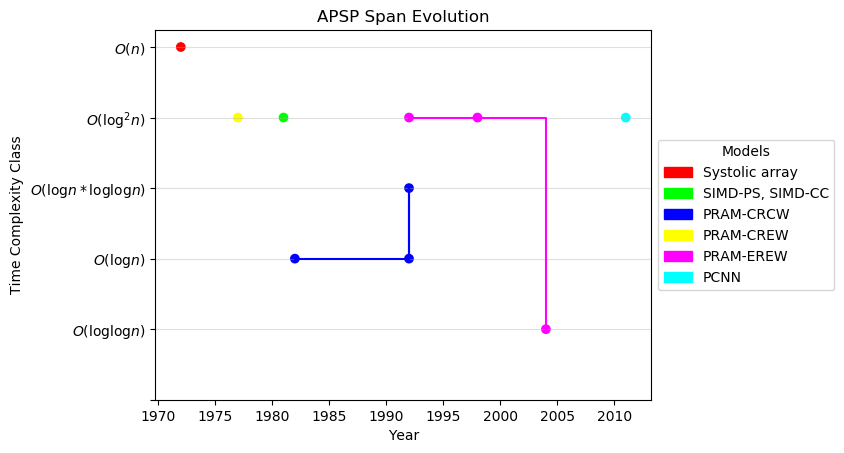

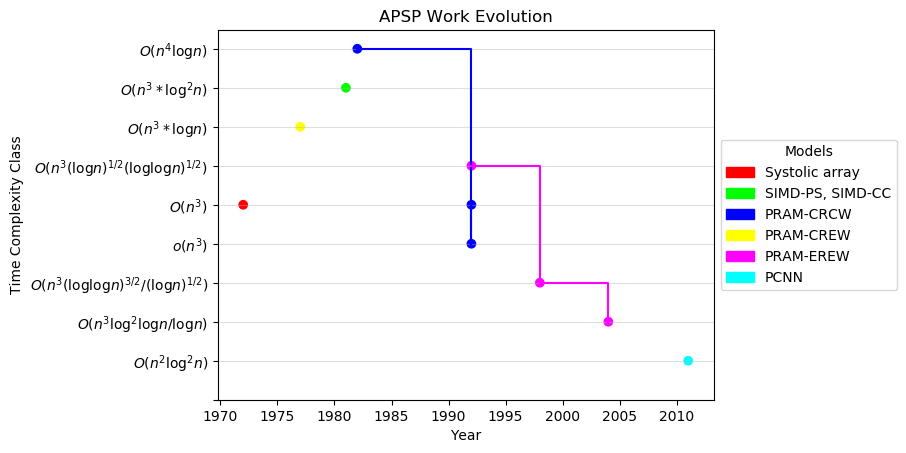

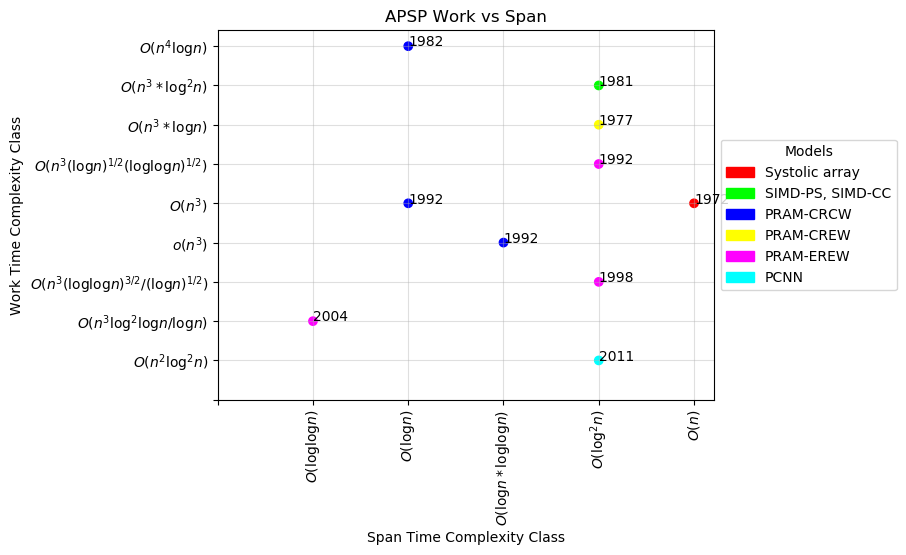

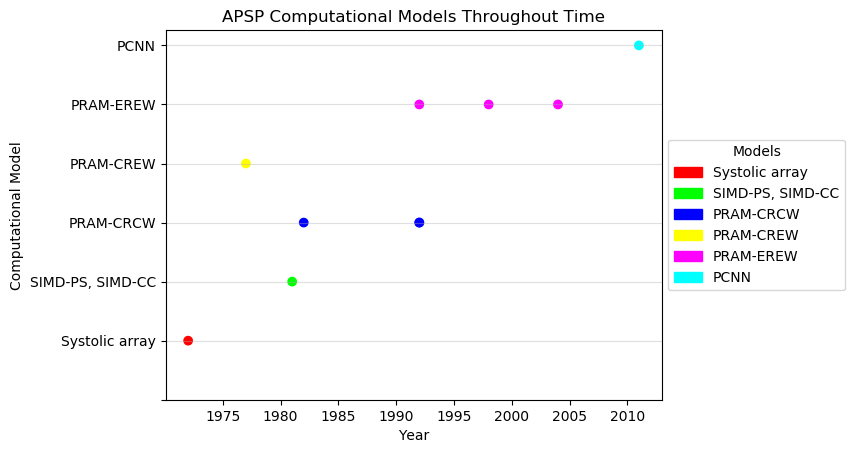

In [41]:
# APSP
apsp_algs = {"Levitt and Kautz (1972)": {"year": 1972, "span": 5 , "work": 5, "model": 1},
        "Savage (1977)": {"year": 1977, "span": 4 , "work": 7, "model": 4},
        "Dekel; Nassimi & Sahni (1981)": {"year": 1981, "span": 4 , "work": 8, "model": 2},
        "Kucera (1982)": {"year": 1982, "span": 2 , "work": 9, "model": 3},
        "Takaoka (1992)": {"year": 1992, "span": 4 , "work": 6, "model": 5},
        "Han, Pan & Reif (1992)": {"year": 1992, "span": 4 , "work": 4, "model": 5},
        "Han, Pan & Reif (1992) (1)": {"year": 1992, "span": 3 , "work": 4, "model": 3},
        "Takaoka (1998)": {"year": 1998, "span": 4 , "work": 3, "model": 5},
        "Takaoka (2004)": {"year": 2004, "span": 1 , "work": 2, "model": 5},
        "Zhang, Wu, Wei & Wang (2011)": {"year": 2011, "span": 4 , "work": 1, "model": 6},
        "Han, Pan & Reif (1992)": {"year": 1992, "span": 2 , "work": 5, "model": 3}}
make_plots1(apsp_algs, "APSP")

In [2]:
# For a given problem, generates the following plots:
#   + work vs time scatter plot
#   + span vs time scatter plot
#   + work vs span scatter plot
#   + work efficiency vs time scatter plot - WE=work/best-known sequential algo complexity
#   + work efficiency vs time scatter plot - WE=work/best-known sequential algo at the time
#   + work efficiency vs time scatter plot - WE=work/best-known lower bound
#   + for certain fixed values of n, WE vs # of processors plot (just a basic function plot)
#       - per model (might do only PRAM); for the algorithm with the lowest span (if tied, lowest work)
#   + parallelism (work/span) vs WE
#   + bar chart - % of algorithms with certain overhead (WE), over time (decades):
#       - 0 (O(1)), logarithmic, polylog, linear, quadratic, more
#
#   At some point in the future also:
#   + average/median plots (TODO: figure out what kinds)
# 
# TODO
# filter the necessary algorithms from the json file
# make plots and save them in a new folder
# input: problem name (string), plot options
# output: saves plot figures in a newly-created folder
def make_plots(problem, data, aux_data, seq_algs, collapse=[]):
    algs = {k: v for k, v in data.items() if v["problem"]==problem}
    name = problem_dict[problem]
    best_seq = aux_data[problem]["best seq"]

    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["span"]))
    years = [algs[name]["year"] for name in names]
    ghosts = [algs[name]["sim"] for name in names]
    spans, span_complexities = standardize_comp([algs[name]["span"] for name in names]+[best_seq], 
                                                collapse="span" if "span" in collapse else None)
    works, work_complexities = standardize_comp([algs[name]["work"] for name in names]+[best_seq])
    wes, we_complexities = standardize_comp([algs[name]["work eff"] for name in names]+[0])
    pars, par_complexities = standardize_comp([algs[name]["par"] for name in names])
    models, complexity_models = standardize_mod([algs[name]["model"] for name in names])
    colors = [all_colors[model] for model in models]
    best_seq_span = spans.pop()
    best_seq_work = works.pop() 
    wes.pop()

    points = len(years)
    assert len(spans) == points
    assert len(works) == points
    assert len(models) == points
    assert wes == works

    seq_names = list(seq_algs.keys())
    seq_names.sort(key= lambda name: (seq_algs[name]["year"], -1*seq_algs[name]["span"]))
    seq_years = [seq_algs[name]["year"] for name in seq_names]
    seq_spans = [seq_algs[name]["span"] for name in seq_names]
    seq_works = [seq_algs[name]["work"] for name in seq_names]

    span_ranges = list(range(0,len(span_complexities)))
    work_ranges = list(range(0,len(work_complexities)))
    par_ranges = list(range(0,len(par_complexities)))
    
    
    plt.style.use('default')

    # SPAN vs TIME
    def span_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(best_seq_span+.05, years[0]-3,years[-1]+3, color='#999999', alpha=1)
        for m in range(1, len(complexity_models)):
            m_years = [years[i] for i in range(points) if models[i]==m]
            m_spans = [spans[i] for i in range(points) if models[i]==m]
            i = 1
            while i < len(m_spans):
                if m_spans[i] > m_spans[i-1]:
                    m_spans.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_spans, c=all_colors[m], where='post', alpha=0.5)
            if m_spans != []:
                if m>7: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                # elif m==2: # TODO: hardcoded
                #     ax.hlines(y=m_spans[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                else:
                    ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [spans[i] for i in range(len(spans)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7, alpha=1)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [spans[i] for i in range(len(spans)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7, alpha=1)
        ax.set_yticks(span_ranges)
        ax.set_yticklabels(span_complexities)
        ax.set_title(name + " - Span Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Sequential Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(span_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        plt.show()
 
    # WORK vs TIME
    def work_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(best_seq_work-.05, years[0]-3,years[-1]+3, color='#999999', alpha=1)
        for m in range(1, len(complexity_models)):
            m_years = [years[i] for i in range(points) if models[i]==m]
            m_works = [works[i] for i in range(points) if models[i]==m]
            i = 1
            while i < len(m_works):
                if m_works[i] > m_works[i-1]:
                    m_works.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_works, c=all_colors[m], where='post', alpha=0.5)
            if m_works != []:
                ax.hlines(y=m_works[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                # if m==4: # TODO: hardcoded
                #     ax.hlines(y=m_works[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                # elif m==2: # TODO: hardcoded
                #     ax.hlines(y=m_works[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                # else:
                #     ax.hlines(y=m_works[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0],
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        # seq_
        # ax.scatter(seq_years, seq_works, c='black', 
        #         marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        # m_years = [seq_algs[name]["year"] for name in seq_names]
        # m_spans = [seq_algs[name]["work"] for name in seq_names]
        # i = 1
        # while i < len(m_spans):
        #     if m_spans[i] > m_spans[i-1]:
        #         m_spans.pop(i)
        #         m_years.pop(i)
        #     else:
        #         i += 1
        # ax.step(m_years, m_spans, c='black', where='post', alpha=0.5)


        ax.set_yticks(work_ranges)
        ax.set_yticklabels(work_complexities)
        ax.set_title(name + " - Work Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        # handles.append(mpatches.Patch(color='black', label="Sequential Algorithms"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(work_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        # ax.set_xlim(seq_years[0]-3,seq_years[-1]+3)
        plt.show()
    
    # WORK vs SPAN
    def work_vs_span():
        fig, ax = plt.subplots(1,1)
        ax.grid(alpha=0.4)
        ax.scatter([spans[i] for i in range(len(spans)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([spans[i] for i in range(len(spans)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_title(name + " - Work vs Span")
        ax.set_xticks(span_ranges)
        ax.set_yticks(work_ranges)
        ax.set_xticklabels(span_complexities, rotation=90)
        ax.set_yticklabels(work_complexities)
        ax.set_ylabel("Work Complexity Class")
        ax.set_xlabel("Span Complexity Class")
        for i in range(len(algs)):
            ax.annotate(years[i],(spans[i],works[i]),zorder=101)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.xlim(left=0.6, right=len(span_complexities)-0.4)
        plt.ylim(bottom=0.6, top=len(work_complexities)-0.6)
        plt.show()

    # WORK EFFICIENCY vs TIME scatter plot - WE=work/best-known sequential algo complexity
    def we_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(1-.05, years[0]-3,years[-1]+3, color='#999999', alpha=1) # TODO: hardcoded lower bound
        for m in range(1, len(complexity_models)):
            m_years = [years[i] for i in range(points) if models[i]==m]
            m_works = [works[i] for i in range(points) if models[i]==m]
            i = 1
            while i < len(m_works):
                if m_works[i] > m_works[i-1]:
                    m_works.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_works, c=all_colors[m], where='post', alpha=0.5)
            if m_works != []:
                ax.hlines(y=m_works[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                # if m==4: # TODO: hardcoded
                #     ax.hlines(y=m_works[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                # elif m==2: # TODO: hardcoded
                #     ax.hlines(y=m_works[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                # else:
                #     ax.hlines(y=m_works[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_yticks(work_ranges)
        ax.set_yticklabels(we_complexities)
        ax.set_title(name + " - Work Efficiency Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(work_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        plt.show()

    # PRARLLELISM vs WORK EFFICIENCY
    def par_vs_we():
        fig, ax = plt.subplots(1,1)
        ax.grid(alpha=0.4)
        ax.scatter([works[i] for i in range(len(works)) if ghosts[i]==1], 
                [pars[i] for i in range(len(pars)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1],
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([works[i] for i in range(len(works)) if ghosts[i]==0], 
                [pars[i] for i in range(len(pars)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_title(name + " - Parallelism")
        ax.set_yticks(par_ranges)
        ax.set_xticks(work_ranges)
        ax.set_yticklabels(par_complexities)
        ax.set_xticklabels(we_complexities, rotation=90)
        ax.set_ylabel("Parallelism")
        ax.set_xlabel("Work Efficiency")
        for i in range(len(algs)):
            ax.annotate(years[i],(works[i],pars[i]),zorder=101)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.xlim(left=0.6, right=len(we_complexities)-0.4)
        plt.ylim(bottom=0.6, top=len(par_complexities)-0.6)
        plt.show()


    span_vs_time()
    work_vs_time()
    work_vs_span()
    we_vs_time()
    par_vs_we()


    pass


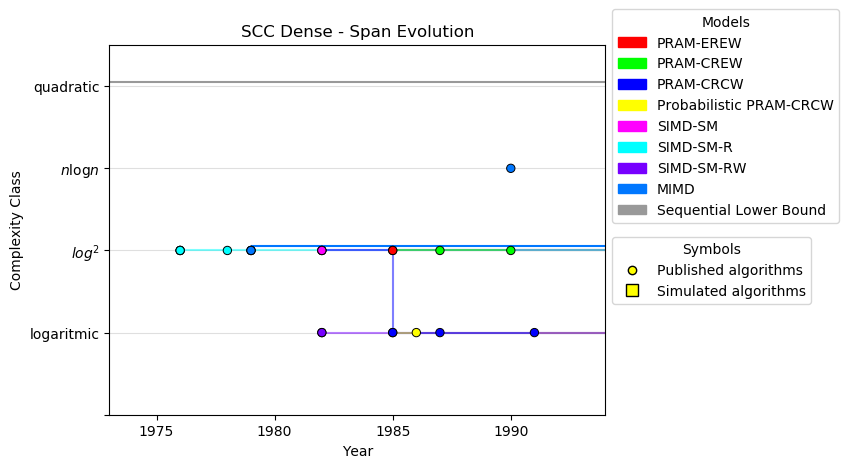

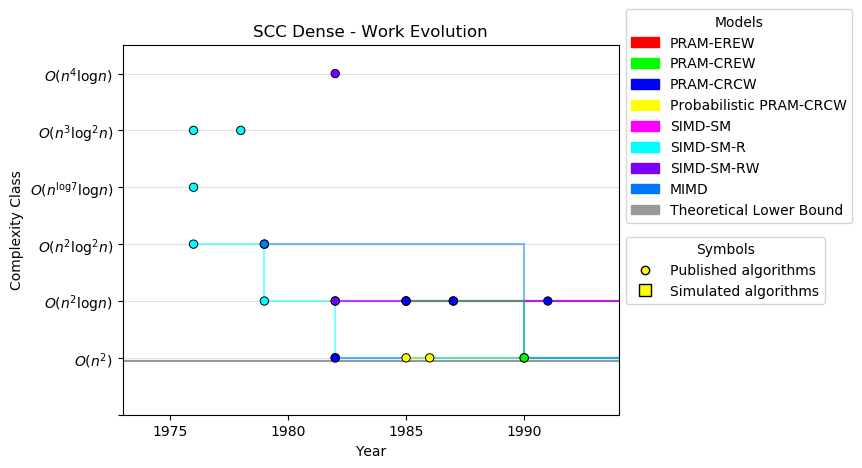

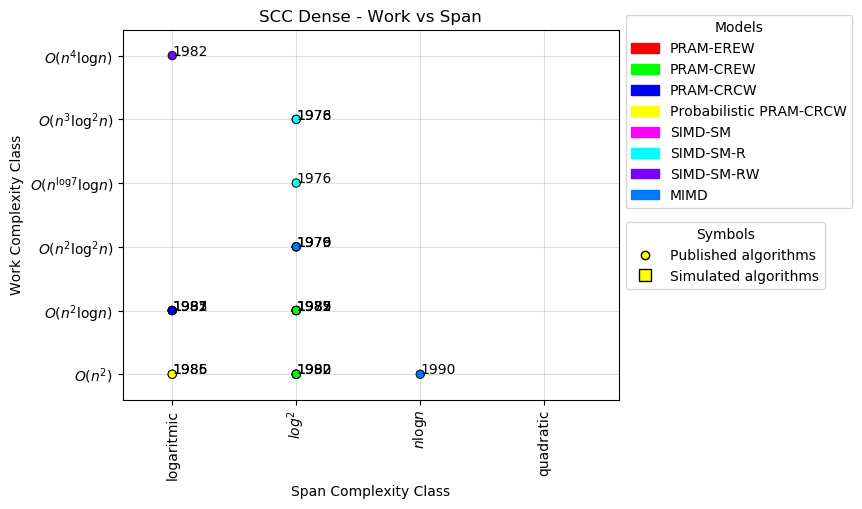

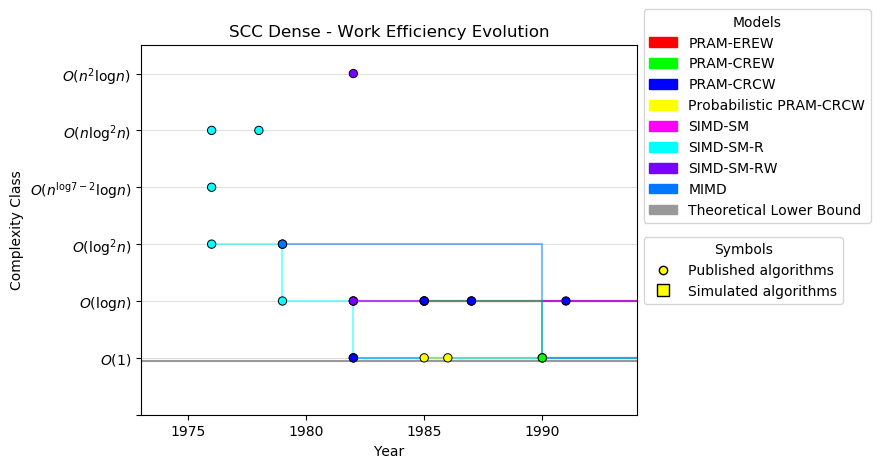

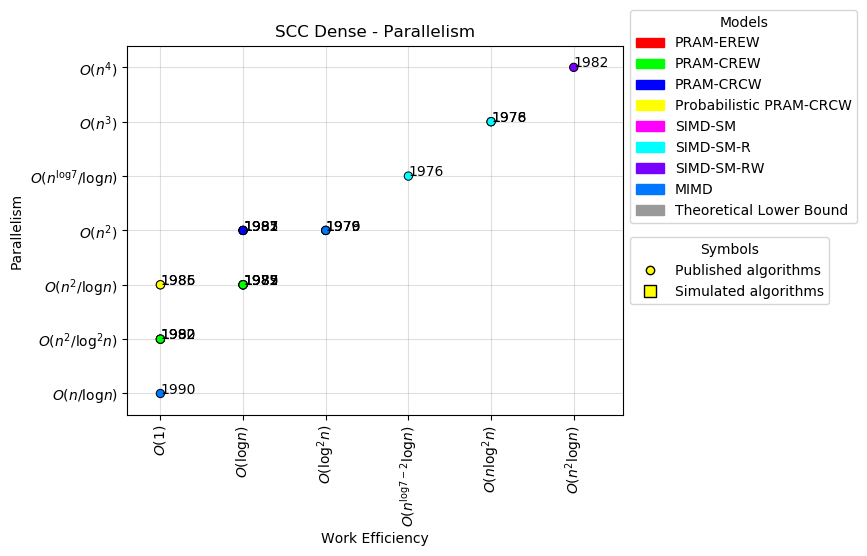

In [4]:

seq_dmst_algs = {
"Borůvka's algorithm (1926)": {"year": 1926, "span": 8, "work": 4},
"Kruskal's algorithm (1956)": {"year": 1956, "span": 8, "work": 4},
"Prim's algorithm + adjacency matrix searching (1957)": {"year": 1957, "span": 7, "work": 3},
"Yao's algorithm (1975)": {"year": 1975, "span": 8, "work": 4},
"Cheriton-Tarjan Algorithm (1976)": {"year": 1976, "span": 8, "work": 4},
"Prim's algorithm + Fibonacci heaps; Fredman & Tarjan (1987)": {"year": 1987, "span": 7, "work": 3},
"Kruskal’s algorithm with demand-sorting (1991)": {"year": 1991, "span": 7, "work": 3},
"Karger; Klein & Tarjan (1995)": {"year": 1995, "span": 7, "work": 3},
"Chazelle's algorithm (2000)": {"year": 2000, "span": 8, "work": 4},
"Thorup (reverse-delete) (2000)": {"year": 2000, "span": 8, "work": 5},
"Quick Kruskal algorithm (2006)": {"year": 2006, "span": 7, "work": 3},
"Filter Kruskal algorithm (2009)": {"year": 2009, "span": 7, "work": 3},
}

make_plots(13.1, full_data, aux_data, {}, collapse=["span"])

In [30]:
# temp cell to find the papers I need

def temp(problem, model, data):
    algs = {k: v for k, v in data.items() if v["problem"]==problem and v["model"]==model}

    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["span"]))
    return algs

# 13.1: CRCW ('13.1-10-Vishkin (1982)', 1982, 2) AND ('13.1-13-Koubek, Kršňáková (1985)', 1985, 1)
# 14.1: EREW ('14.1-11-Johnson, Metaxas (1992)', 1992, 1.5) AND ('14.1-9-Nath and Maheshwari (1982)', 1982, 3)
#       CREW ('14.1-5-Savage (1977)', 1977, 2) AND ('14.1-12-Johnson, Metaxas (1992)', 1992, 1.5)
# 17:   EREW ('17-6-Han, Pan & Reif (1992)', 1992, 2) AND ('17-9-Takaoka (2004)', 2004, 0.1)
#           OR ('17-5-Takaoka (1992)', 1992, 2)


for name, alg in temp(17,130,full_data).items():
    print((name,alg["year"], alg["span"]))



('17-7-Han, Pan & Reif (1992)', 1992, 1.1)
('17-4-Kucera (1982)', 1982, 1)


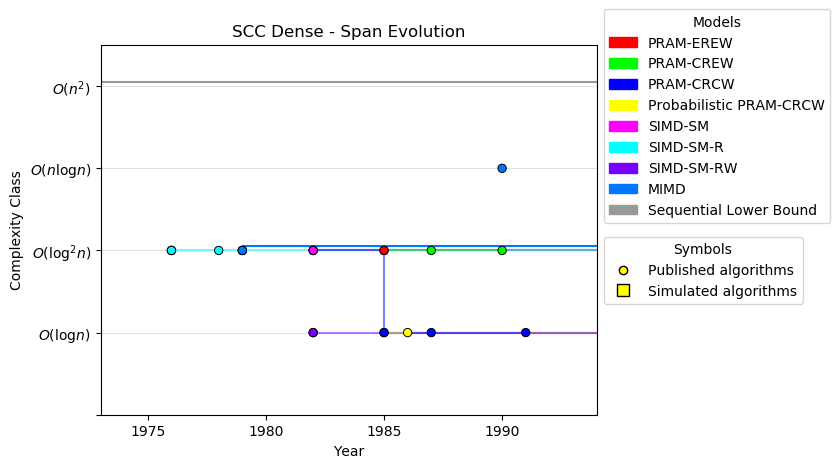

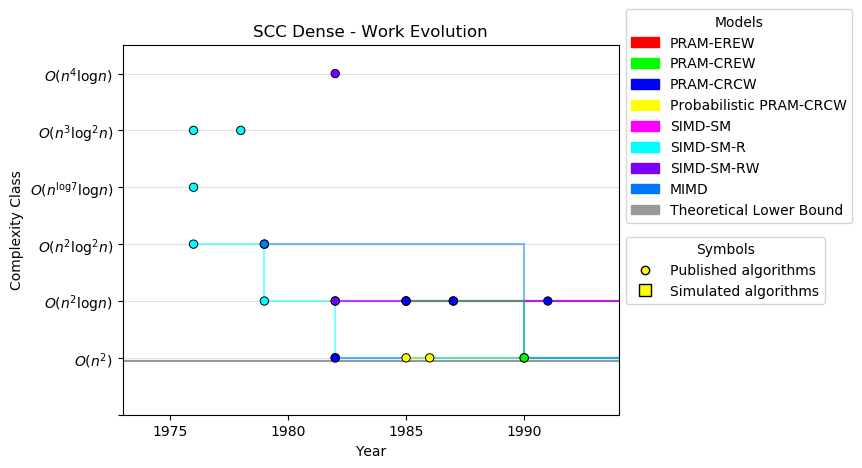

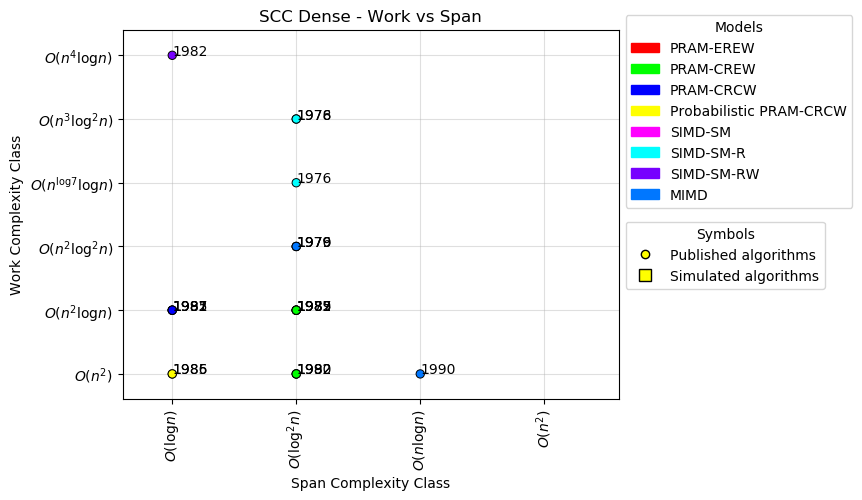

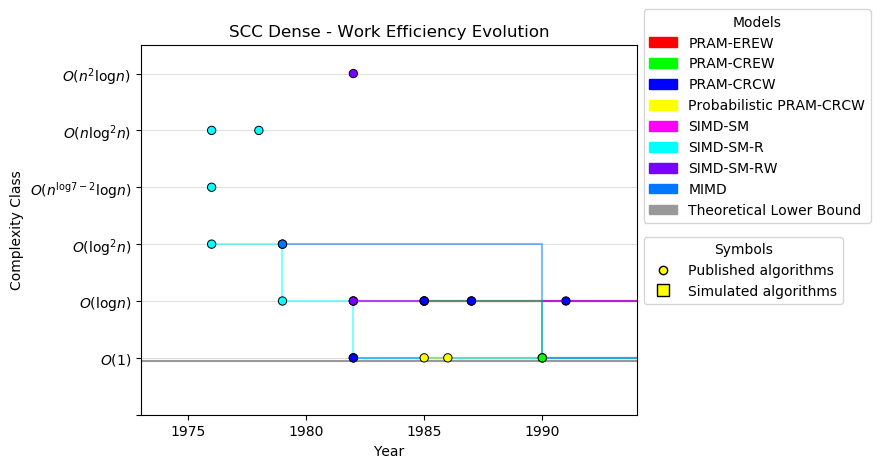

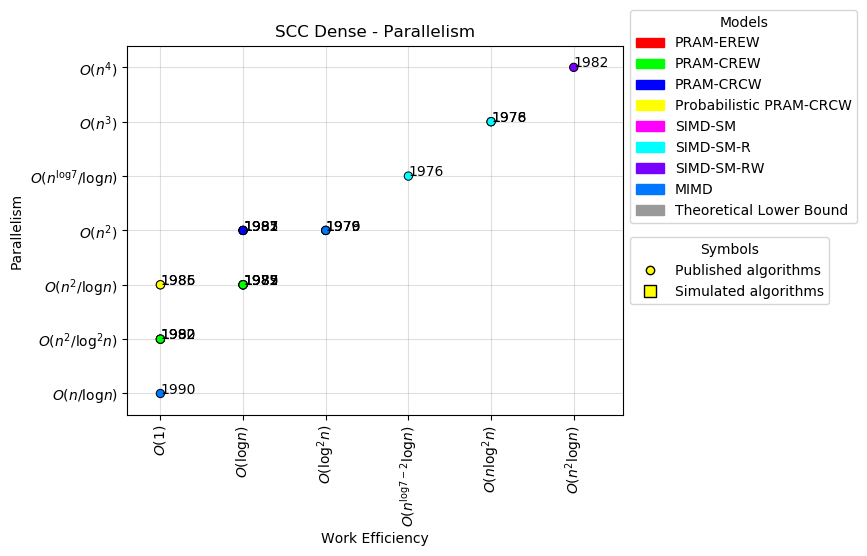

In [5]:
make_plots(13.1, full_data, aux_data, {})

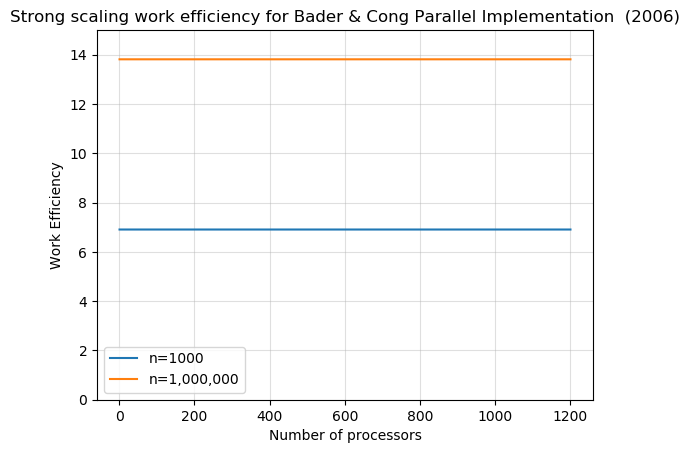

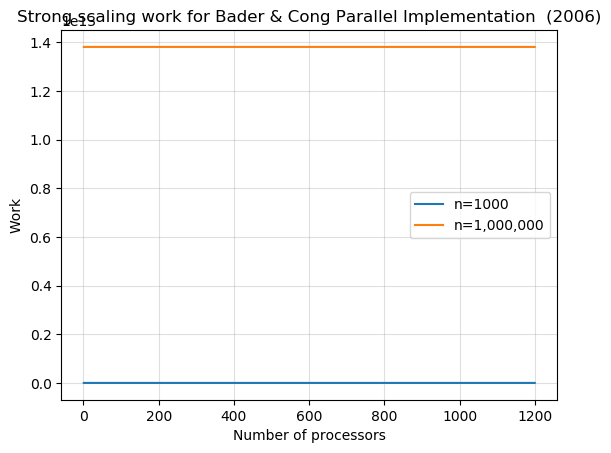

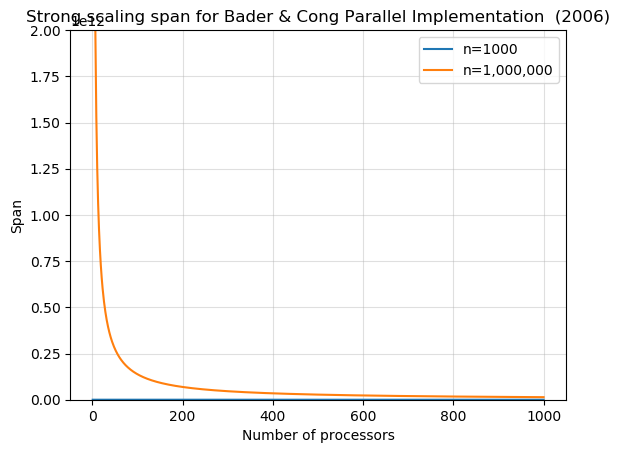

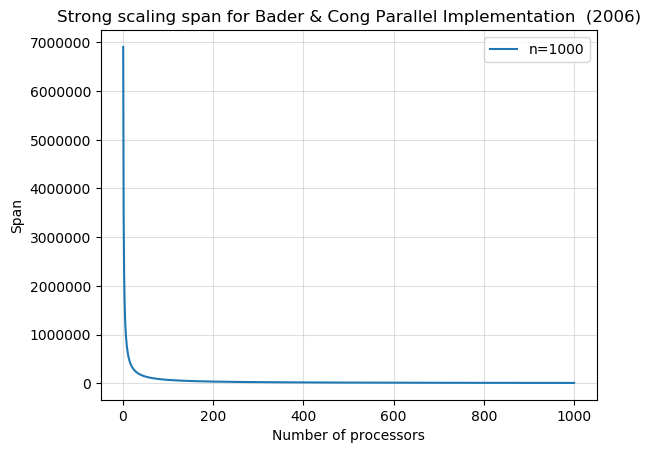

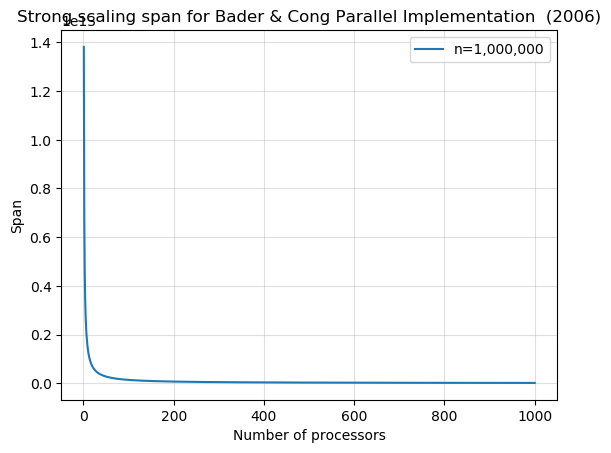

In [34]:
# plots pertaining to one algorithm at a time. Takes algo as input. Currently hard-coded.
def make_algorithm_plots():
    # STRONG SCALING
    # WE vs # of processors plot (just a basic function plot)
    alg_name = "Bader & Cong Parallel Implementation  (2006)"
    
    # WE = O(log(n))
    # work = O(n^2*log(n))
    # span = O(n^2*log(n)/p)
    def logn3(x):
        n=10**3
        return [math.log(n)]*len(x)
    def n2logn3(x):
        n=10**3
        return [n**2*math.log(n)]*len(x)
    def n2lognp3(x):
        n=10**3
        return n**2*math.log(n)/x #if (x<=n and x>0) else n*math.log(n)
    def logn6(x):
        n=10**6
        return [math.log(n)]*len(x)
    def n2logn6(x):
        n=10**6
        return [n**2*math.log(n)]*len(x)
    def n2lognp6(x):
        n=10**6
        return n**2*math.log(n)/x #if (x<=n and x>0) else n*math.log(n)
    
    # work efficiency
    x = np.linspace(1, 1200, 1200)
    y1 = logn3(x)
    y2 = logn6(x)

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling work efficiency for "+alg_name)
    ax.set_ylim(0, 15)
    ax.set_ylabel("Work Efficiency")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()

    # work
    x = np.linspace(1, 1200, 1200)
    y1 = n2logn3(x)
    y2 = n2logn6(x)

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling work for "+alg_name)
    ax.set_ylabel("Work")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()
    
    # span
    x = np.linspace(1, 1000, 1000)
    y1 = n2lognp3(x)
    y2 = n2lognp6(x)

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling span for "+alg_name)
    ax.set_ylim(0, 2e12)
    ax.set_ylabel("Span")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()
    
    # span - n=1000
    x = np.linspace(1, 1000, 1000)
    y1 = n2lognp3(x)
    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y1, label='n=1000')
    ax.set_title("Strong scaling span for "+alg_name)
    ax.set_ylabel("Span")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()
    
    # span - n=1000000
    x = np.linspace(1, 1000, 1000)
    y2 = n2lognp6(x)

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling span for "+alg_name)
    ax.set_ylabel("Span")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()
    pass

make_algorithm_plots()

In [16]:
# looking for the most clear and visually pleasing ways of displaying information
def test_plot_appearance(algs,name,span_complexities,work_complexities,we_complexities,par_complexities,complexity_models):    
    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["span"]))
    years = [algs[name]["year"] for name in names]
    works = [algs[name]["work"] for name in names]
    models = [algs[name]["model"] for name in names]
    ghosts = [algs[name]["sim"] for name in names]
    colors = [all_colors[algs[name]["model"]] for name in names]
    work_ranges = list(range(0,len(work_complexities)))

    plt.rcParams.update({
    "font.family": "Helvetica"
        })
    
    plt.style.use('default')
    
    # WORK vs TIME
    fig, ax = plt.subplots(1,1)
    ax.grid(axis='y', alpha=0.4)
    # ax.hlines(3-.05, years[0]-2,years[-1]+2, color='#999999', alpha=1) # TODO: hardcoded lower bound
    for m in range(len(models)):
        m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
        m_spans = [algs[name]["work"] for name in names if algs[name]["model"]==m]
        i = 1
        while i < len(m_spans):
            if m_spans[i] > m_spans[i-1]:
                m_spans.pop(i)
                m_years.pop(i)
            else:
                i += 1
        ax.step(m_years, m_spans, c=all_colors[m], where='post', alpha=0.5)
        if m_spans != []:
            if m==4: # TODO: hardcoded
                ax.hlines(y=m_spans[-1]+.06,xmin=m_years[-1],xmax=years[-1]+2,color=all_colors[m],alpha=1)
            elif m==2: # TODO: hardcoded
                ax.hlines(y=m_spans[-1]+.05,xmin=m_years[-1],xmax=years[-1]+2,color=all_colors[m],alpha=0.5)
            else:
                ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+2,color=all_colors[m],alpha=0.5)
    ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
               [works[i] for i in range(len(works)) if ghosts[i]==1], 
               c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
               marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
    ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0],
               [works[i] for i in range(len(works)) if ghosts[i]==0],
               c=[colors[i] for i in range(len(colors)) if ghosts[i]==0],
               marker='o',zorder=100,edgecolors='black',linewidth=0.7)
    ax.set_yticks(work_ranges)
    ax.set_yticklabels(work_complexities)
    ax.set_title(name + "Work Evolution")
    ax.set_ylabel("Complexity Class")
    ax.set_xlabel("Year")
    ax.xaxis.get_major_locator().set_params(integer=True)
    # legends
    handles = []
    for i in range(1,len(complexity_models)):
        new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
        handles.append(new_patch)
    handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
    model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
    ax.add_artist(model_legend)
    pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                            markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
    sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                            markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
    handles=[pub_symbol, sim_symbol]
    ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
    ax.set_ylim(0, len(work_complexities)-.5)
    ax.set_xlim(years[0]-2,years[-1]+2)
    plt.show()
    pass

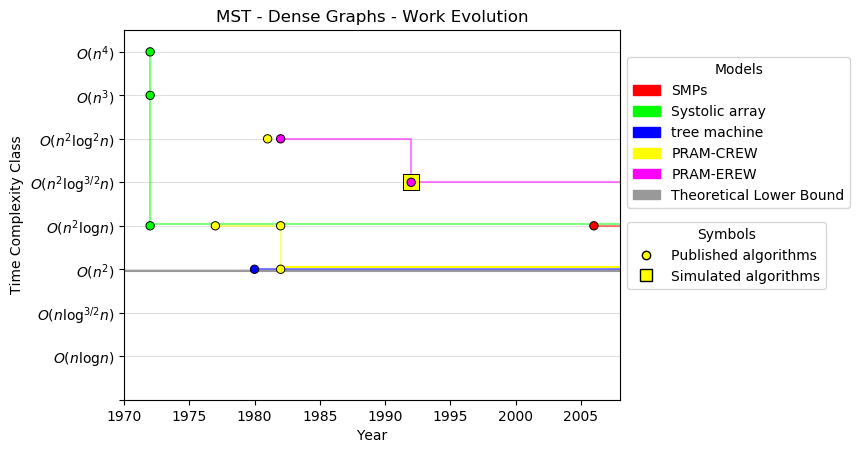

In [17]:
work_complexities = ["","$O(n \log{n})$","$O(n \log^{3/2}{n})$",'$O(n^2)$',"$O(n^2 \log{n})$",
                     "$O(n^2 \log^{3/2}{n})$","$O(n^2 \log^2{n})$","$O(n^3)$","$O(n^4)$"]

test_plot_appearance(dmst_algs, "MST - Dense Graphs - ", span_complexities, work_complexities, 
           we_complexities, par_complexities, complexity_models)

In [111]:
# Exactly like make_plots(), but small visual changes for particular plots for SCC
def make_plots2(algs,name,span_complexities,work_complexities,we_complexities,par_complexities,complexity_models):
    names = list(algs.keys())
    names.sort(key= lambda name: (algs[name]["year"], -1*algs[name]["span"]))
    years = [algs[name]["year"] for name in names]
    spans = [algs[name]["span"] for name in names]
    works = [algs[name]["work"] for name in names]
    models = [algs[name]["model"] for name in names]
    ghosts = [algs[name]["sim"] for name in names]
    pars = [algs[name]["par"] for name in names]
    colors = [all_colors[algs[name]["model"]] for name in names]

    span_ranges = list(range(0,len(span_complexities)))
    work_ranges = list(range(0,len(work_complexities)))
    par_ranges = list(range(0,len(par_complexities)))
    
    # SPAN vs TIME
    def span_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(7+.05, years[0]-3,years[-1]+3, color='#999999', alpha=1) # TODO: hardcoded lower bound
        for m in range(len(complexity_models)):
            m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
            m_spans = [algs[name]["span"] for name in names if algs[name]["model"]==m]
            i = 1
            while i < len(m_spans):
                if m_spans[i] > m_spans[i-1]:
                    m_spans.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_spans, c=all_colors[m], where='post', alpha=0.5)
            if m_spans != []:
                if m>10: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                # elif m==2: # TODO: hardcoded
                #     ax.hlines(y=m_spans[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                else:
                    ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [spans[i] for i in range(len(spans)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [spans[i] for i in range(len(spans)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_yticks(span_ranges)
        ax.set_yticklabels(span_complexities)
        ax.set_title(name + "Span Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Sequential Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(span_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        plt.show()
 
    # WORK vs TIME
    def work_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(1-.05, years[0]-3,years[-1]+3, color='#999999', alpha=1) # TODO: hardcoded lower bound
        for m in range(len(complexity_models)):
            m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
            m_spans = [algs[name]["work"] for name in names if algs[name]["model"]==m]
            i = 1
            while i < len(m_spans):
                if m_spans[i] > m_spans[i-1]:
                    m_spans.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_spans, c=all_colors[m], where='post', alpha=0.5)
            if m_spans != []:
                if m==4: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                elif m==2: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                else:
                    ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_yticks(work_ranges)
        ax.set_yticklabels(work_complexities)
        ax.set_title(name + "Work Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(work_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        plt.show()
    
    # WORK vs SPAN
    def work_vs_span():
        fig, ax = plt.subplots(1,1)
        ax.grid(alpha=0.4)
        ax.scatter([spans[i] for i in range(len(spans)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([spans[i] for i in range(len(spans)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_title(name + "Work vs Span")
        ax.set_xticks(span_ranges)
        ax.set_yticks(work_ranges)
        ax.set_xticklabels(span_complexities, rotation=90)
        ax.set_yticklabels(work_complexities)
        ax.set_ylabel("Work Complexity Class")
        ax.set_xlabel("Span Complexity Class")
        for i in range(len(algs)):
            ax.annotate(years[i],(spans[i],works[i]),zorder=101)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.show()

    # WORK EFFICIENCY vs TIME scatter plot - WE=work/best-known sequential algo complexity
    def we_vs_time():
        fig, ax = plt.subplots(1,1)
        ax.grid(axis='y', alpha=0.4)
        ax.hlines(1-.05, years[0]-3,years[-1]+3, color='#999999', alpha=1) # TODO: hardcoded lower bound
        for m in range(len(complexity_models)):
            m_years = [algs[name]["year"] for name in names if algs[name]["model"]==m]
            m_spans = [algs[name]["work"] for name in names if algs[name]["model"]==m]
            i = 1
            while i < len(m_spans):
                if m_spans[i] > m_spans[i-1]:
                    m_spans.pop(i)
                    m_years.pop(i)
                else:
                    i += 1
            ax.step(m_years, m_spans, c=all_colors[m], where='post', alpha=0.5)
            if m_spans != []:
                if m==4: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.06,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=1)
                elif m==2: # TODO: hardcoded
                    ax.hlines(y=m_spans[-1]+.05,xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
                else:
                    ax.hlines(y=m_spans[-1],xmin=m_years[-1],xmax=years[-1]+3,color=all_colors[m],alpha=0.5)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==1], 
                [works[i] for i in range(len(works)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1], 
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([years[i] for i in range(len(years)) if ghosts[i]==0], 
                [works[i] for i in range(len(works)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_yticks(work_ranges)
        ax.set_yticklabels(we_complexities)
        ax.set_title(name + "Work Efficiency Evolution")
        ax.set_ylabel("Complexity Class")
        ax.set_xlabel("Year")
        ax.xaxis.get_major_locator().set_params(integer=True)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        ax.set_ylim(0, len(work_complexities)-.5)
        ax.set_xlim(years[0]-3,years[-1]+3)
        plt.show()

    # PRARLLELISM vs WORK EFFICIENCY
    def par_vs_we():
        fig, ax = plt.subplots(1,1)
        ax.grid(alpha=0.4)
        ax.scatter([works[i] for i in range(len(works)) if ghosts[i]==1], 
                [pars[i] for i in range(len(pars)) if ghosts[i]==1], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==1],
                marker='s',s=121,zorder=99,edgecolors='black',linewidth=0.7)
        ax.scatter([works[i] for i in range(len(works)) if ghosts[i]==0], 
                [pars[i] for i in range(len(pars)) if ghosts[i]==0], 
                c=[colors[i] for i in range(len(colors)) if ghosts[i]==0], 
                marker='o',zorder=100,edgecolors='black',linewidth=0.7)
        ax.set_title(name + "Parallelism")
        ax.set_yticks(par_ranges)
        ax.set_xticks(work_ranges)
        ax.set_yticklabels(par_complexities)
        ax.set_xticklabels(we_complexities, rotation=90)
        ax.set_ylabel("Parallelism")
        ax.set_xlabel("Work Efficiency")
        for i in range(len(algs)):
            ax.annotate(years[i],(works[i],pars[i]),zorder=101)
        # legends
        handles = []
        for i in range(1,len(complexity_models)):
            new_patch = mpatches.Patch(color=str(all_colors[i]), label=complexity_models[i])
            handles.append(new_patch)
        handles.append(mpatches.Patch(color='#999999', label="Theoretical Lower Bound"))
        model_legend = ax.legend(handles=handles,loc='lower left', bbox_to_anchor=(1, 0.5), title="Models")
        ax.add_artist(model_legend)
        pub_symbol = mlines.Line2D([], [], color='#ffff00', marker='o', linestyle='None',
                                markersize=6,markeredgecolor='black',linewidth=0.7, label='Published algorithms')
        sim_symbol = mlines.Line2D([], [], color='#ffff00', marker='s', linestyle='None',
                                markersize=9,markeredgecolor='black',linewidth=0.7, label='Simulated algorithms')
        handles=[pub_symbol, sim_symbol]
        ax.legend(handles=handles,loc='upper left', bbox_to_anchor=(1, 0.5), title="Symbols")
        plt.xlim(left=2.6) # TODO: get rid of hardcoding
        plt.ylim(bottom=0.6)
        plt.show()


    span_vs_time()
    work_vs_time()
    work_vs_span()
    we_vs_time()
    par_vs_we()

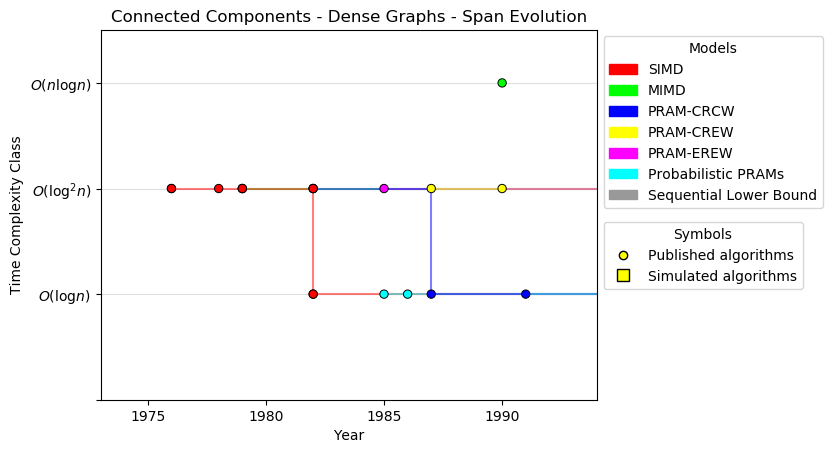

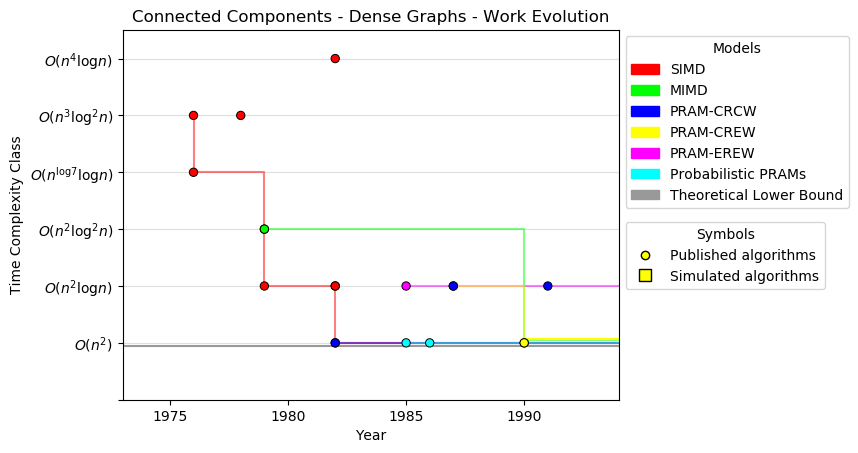

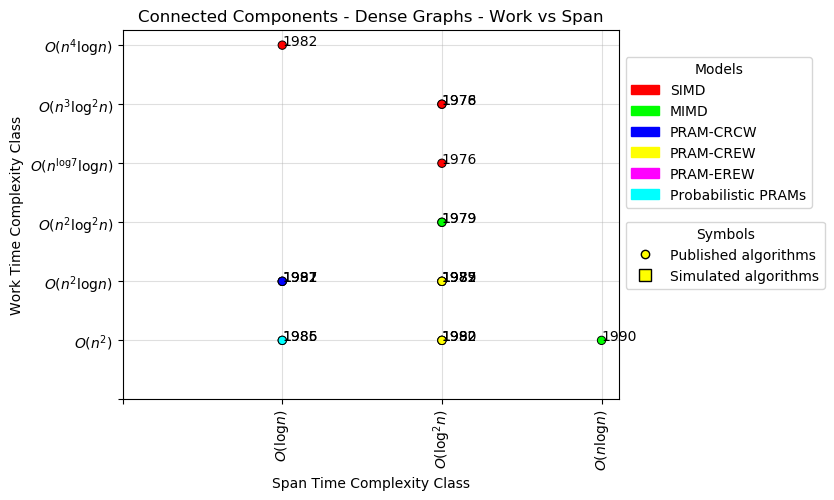

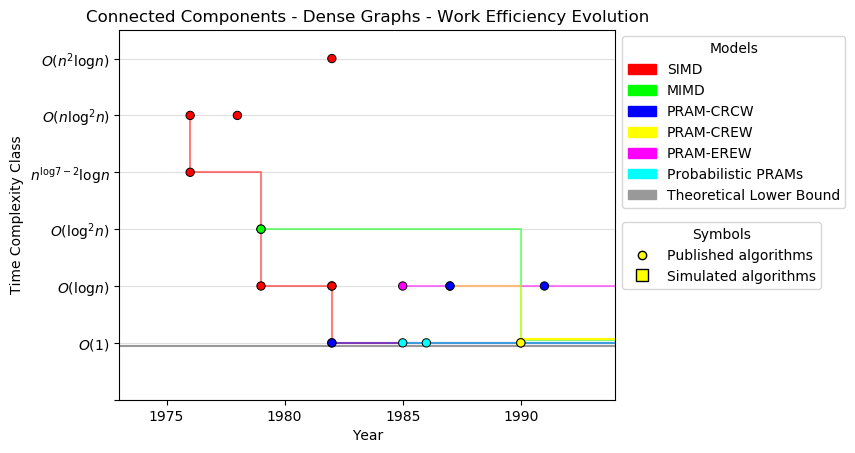

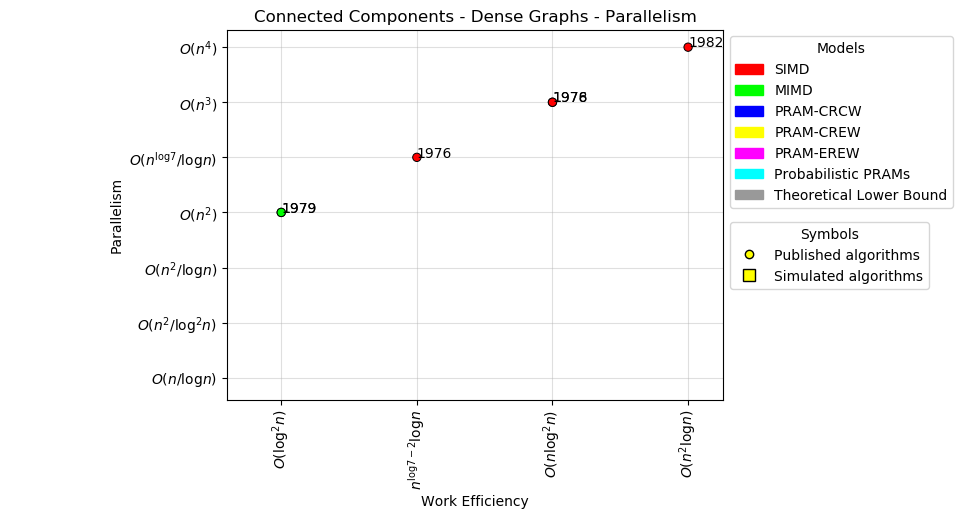

In [112]:
# Connected Components - dense graphs
dcc_algs = {
"Shiloach and Vishkin (1982)": {"year": 1982, "span": 1, "work": 2, "sim": 0, "par": 4, "model": 1},
"Kucera (1982)": {"year": 1982, "span": 1, "work": 6, "sim": 0, "par": 7, "model": 1},
"Hirschberg (1976)": {"year": 1976, "span": 2, "work": 3, "sim": 0, "par": 4, "model": 1},
"Reghbati (Arjomandi) and Corneil (1978)": {"year": 1978, "span": 2, "work": 5, "sim": 0, "par": 6, "model": 1},
"Hirschberg et al. (1979)": {"year": 1979, "span": 2, "work": 3, "sim": 0, "par": 4, "model": 1},
"Chin et al. (1982)": {"year": 1982, "span": 2, "work": 1, "sim": 0, "par": 2, "model": 1},
"Hirschberg (1976)": {"year": 1976, "span": 2, "work": 5, "sim": 0, "par": 6, "model": 1},
"Chandra (1976)": {"year": 1976, "span": 2, "work": 4, "sim": 0, "par": 5, "model": 1},
"Wyllie (1979)": {"year": 1979, "span": 2, "work": 3, "sim": 0, "par": 4, "model": 2},
"Vishkin (1982)": {"year": 1982, "span": 2, "work": 1, "sim": 0, "par": 2, "model": 3},
"Das, Deo, Prasad (1990)": {"year": 1990, "span": 3, "work": 1, "sim": 0, "par": 1, "model": 2},
"Awerbuch, Shiloach (1987)": {"year": 1987, "span": 1, "work": 2, "sim": 0, "par": 4, "model": 3},
"Koubek, Kršňáková (1985)": {"year": 1985, "span": 1, "work": 2, "sim": 0, "par": 4, "model": 3},
"Cole, Vishkin (1991)": {"year": 1991, "span": 1, "work": 2, "sim": 0, "par": 4, "model": 3},
"Cole, Vishkin (1987)": {"year": 1987, "span": 2, "work": 2, "sim": 0, "par": 3, "model": 4},
"Han, Wagner (1990)": {"year": 1990, "span": 2, "work": 1, "sim": 0, "par": 2, "model": 4},
"Koubek, Kršňáková (1985)": {"year": 1985, "span": 2, "work": 2, "sim": 0, "par": 3, "model": 4},
"Koubek, Kršňáková (1985)": {"year": 1985, "span": 2, "work": 2, "sim": 0, "par": 3, "model": 5},
"Nath and Maheshwari (1982)": {"year": 1982, "span": 2, "work": 2, "sim": 0, "par": 3, "model": 1},
"Reif (1985)": {"year": 1985, "span": 1, "work": 1, "sim": 0, "par": 3, "model": 6},
"Gazit (1986)": {"year": 1986, "span": 1, "work": 1, "sim": 0, "par": 3, "model": 6},
"Hirschberg, Chandra, Sarwate (1979)": {"year": 1979, "span": 2, "work": 2, "sim": 0, "par": 3, "model": 1},
}
# best known sequential algorithm is linear (O(m+n), in this case O(n^2))
span_complexities = ["", "$O(\log{n})$", "$O(\log^2{n})$", "$O(n \log{n})$"]
work_complexities = ["", "$O(n^2)$", "$O(n^2 \log{n})$", "$O(n^2 \log^2{n})$", 
                     "$O(n^{\log 7} \log{n})$", "$O(n^3 \log^2{n})$", "$O(n^4 \log{n})$"]
we_complexities = ["", "$O(1)$", "$O(\log{n})$", "$O(\log^2{n})$", "$n^{\log{7}-2} \log{n}$", 
                   "$O(n \log^2{n})$", "$O(n^2 \log{n})$"]
complexity_models = ["", "SIMD", "MIMD", "PRAM-CRCW", "PRAM-CREW", "PRAM-EREW", "Probabilistic PRAMs"]
par_complexities = ["", "$O(n/\log{n})$", "$O(n^2/\log^2{n})$", "$O(n^2/\log{n})$", "$O(n^2)$", 
                    "$O(n^{\log7}/\log{n})$", "$O(n^3)$", "$O(n^4)$"]
make_plots2(dcc_algs, "Connected Components - Dense Graphs - ", span_complexities, work_complexities, 
           we_complexities, par_complexities, complexity_models)

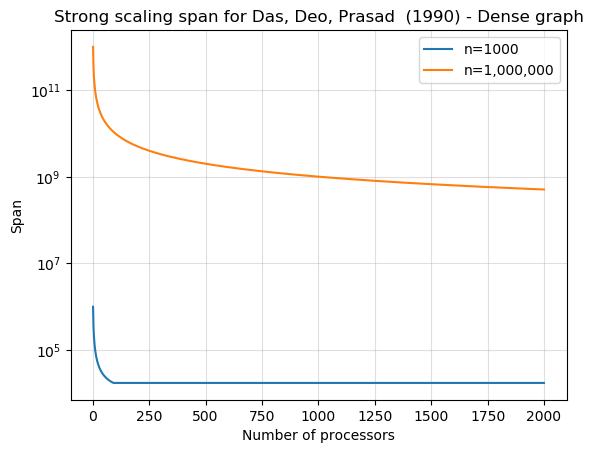

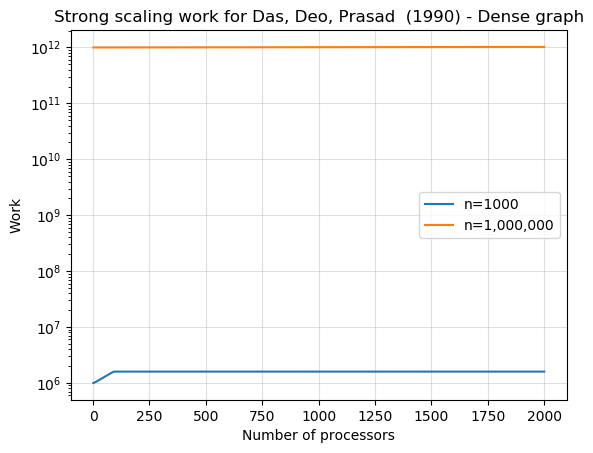

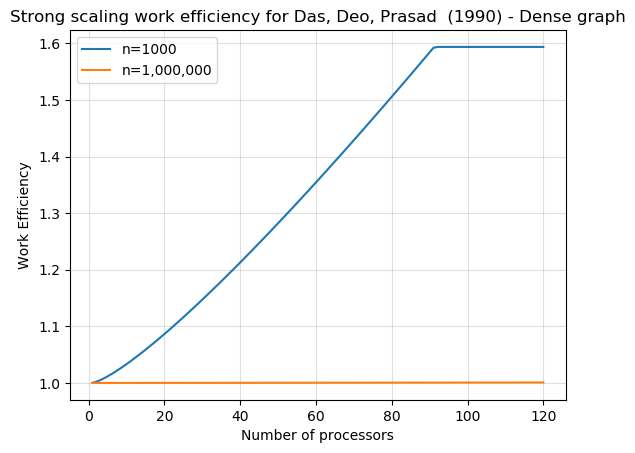

In [95]:
# plots pertaining the Das, Deo, Prasad connected component algorithm
def make_ddp_plots():
    # STRONG SCALING
    # WE vs # of processors plot (just a basic function plot)
    alg_name = "Das, Deo, Prasad  (1990) - Dense graph"
    
    # p <= (n)/(1 +log(n))

    # span = O(n^2/p + n log p)
    # work = O(n^2 + np log p)
    # WE = O(1 + p/n log p)
    def span(x,p):
        n=10**p
        x_max=n/(1+math.log(n,2))
        max_span = n*(1+math.log(n,2)) + n*math.log(x_max,2)
        return n**2/x + n*math.log(x,2) if x <= x_max else max_span
    def work(x,p):
        n=10**p
        x_max = n/(1+math.log(n,2))
        max_work = n**2 + n*x_max*math.log(x_max,2)
        return n**2 + n*x*math.log(x,2) if x <= x_max else max_work
    def we(x,p):
        n=10**p
        x_max = n/(1+math.log(n,2))
        max_we = 1 + x_max/n*math.log(x_max,2)
        return 1 + x/n*math.log(x,2) if x <= x_max else max_we
    
    # span
    x = np.linspace(1, 2000, 2000)
    y1 = np.array([span(i,3) for i in x])
    y2 = np.array([span(i,6) for i in x])
    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.set_yscale('log')
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling span for "+alg_name)
    ax.set_ylabel("Span")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()

    # work
    x = np.linspace(1, 2000, 2000)
    y1 = np.array([work(i,3) for i in x])
    y2 = np.array([work(i,6) for i in x])

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.set_yscale('log')
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling work for "+alg_name)
    ax.set_ylabel("Work")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()

    # work efficiency
    x = np.linspace(1, 120, 120)
    y1 = np.array([we(i,3) for i in x])
    y2 = np.array([we(i,6) for i in x])

    fig, ax = plt.subplots(1,1)
    ax.grid(alpha=0.4)
    ax.plot(x, y1, label='n=1000')
    ax.plot(x, y2, label='n=1,000,000')
    ax.set_title("Strong scaling work efficiency for "+alg_name)
    # ax.set_ylim(0, 15)
    ax.set_ylabel("Work Efficiency")
    ax.set_xlabel("Number of processors")
    plt.legend()
    plt.show()    
    
    pass

make_ddp_plots()